# 환경설정

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/MVDA_2301/')
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/MVDA_2301'

In [ ]:
print(os.listdir())

['MVDA_2301_2_visualize.ipynb', 'MVDA_2301_3_simple_regression.ipynb', 'data', 'MVDA_2301_1_Data_wrangling.ipynb', 'MVDA_2301_4_multi_regression.ipynb', 'CarPrice.ipynb']


In [ ]:
# 결과값 전부 보여주기
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('data/CarPrice_Assignment.csv')

# 데이터 확인

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0
3,4,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,five,136,3.19,3.40,8.5,110,5500,19,25,18920.0
4,5,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,five,131,3.13,3.40,8.3,140,5500,17,20,23875.0


## 데이터 설명
<details>
  <summary>변수 설명(더보기)</summary>

    - Car ID: 차량별 인식 ID
    - Symbol: 차량 심볼마크 개수
    - CarName: 차량 이름(차량 회사로 전처리 필요)
    - fueltype: 연료 타입
      - gas: 가스
      - diesel: 디젤
    - aspiration: 엔진 작동 방식
      - std: 기본
      - turbo: 터보
    - door number: 문 개수
    - carbody: 차량 형태 타입
      - convertible: 변형가능 차(오픈카 같은)
      - hatchback: 해치백
      - sedan: 세단
      - wagon: 경차
      - hartop: 하드탑
    - drivewheel: 동륜방식
      - rwd: 후륜구동
      - fwd: 전륜구동
      - 4wd: 4륜구동
    - enginelocation: 엔진 위치
      - front: 전면
      - rear: 후면
    - enginetype: 엔진 타입
      - dohc
      - ohcv
      - ohc
      - I
      - rotor
      - ohcf
      - dohcv
    - wheelbase: 앞-뒷 바퀴 거리
    - carlength: 차 길이
    - carwidth: 차 너비
    - carheight:	차 높이
    - curbweight:	차 무게
    - cylindernumber:	실린더 개수
    - enginsize: 엔진 크기
    - fuelsystem:	연료 계통 창치
      - mpfi
      - 2bbl
      - mfi
      - 1bbl
      - spfi
      - 4bbl
      - idi
      - spdi
    - boreratio: 스트로크 비율
    - stroke: 엔진 스트로크
    - compressionratio: 압축비
    - horse power: 마력
    - peakrpm: 분당 회전수
    - citympg: 도시 연비
    - highway mpg: 고속도로 연비

    - price: 차량 가격(종속변수 예정)
</details>

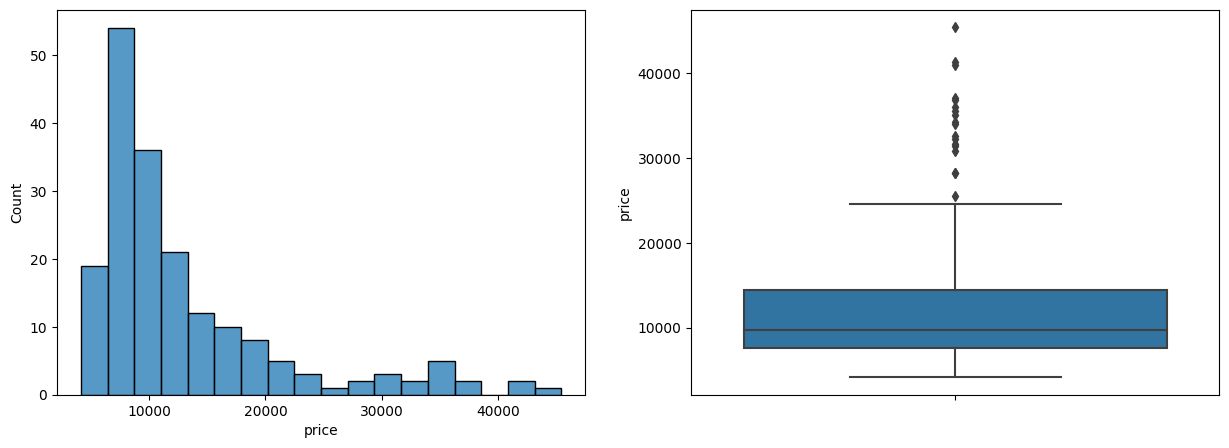

In [ ]:
fig, axes = plt.subplots(1, 2,figsize=(15, 5))
sns.histplot(data=df,x='price',ax=axes[0])
sns.boxplot(y=df.price, ax=axes[1])

plt.show()

- 데이터에 이상치(outlier) 값이 많은것으로 판단.
- 사분 범위를 사용하여 이상치 제거
- IQR = Q3 - Q1
- Q1-1.5*IQR ~ Q3+1.5IQR 의 범위 외는 이상치로 판단

# 데이터 전처리

## 이상치 제거

In [ ]:
# Q1-1.5*IQR ~ Q3+1.5IQR 의 범위 외는 이상치로 판단

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3-Q1

IQR_df = df[(df['price'] >= Q1-(1.5*IQR)) & (df['price'] <= Q3+(1.5*IQR))]

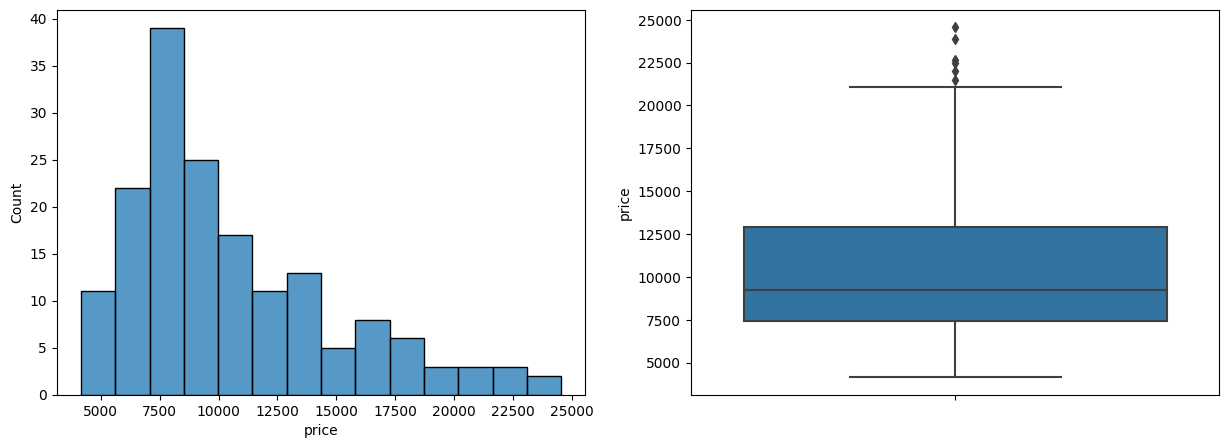

In [ ]:
fig, axes = plt.subplots(1, 2,figsize=(15, 5))
sns.histplot(data=IQR_df,x='price', bins = 14, ax=axes[0])
sns.boxplot(y=IQR_df.price, ax=axes[1])

plt.show()

- 이상치 값들이 많이 제거된 것을 확인 가능
- 새로운 이상치 값은 이상치가 제거된 원본 데이터의 평균과 표준편차가 변경되어 나타난 것임.

1. 자동차 모델 명을 회사명으로 변경
2. 회사명 통일 (maxda, mazda / Nissan, nissan 등)

## 변수명 통일

In [ ]:
CompanyName = IQR_df['CarName'].apply(lambda x : x.split(' ')[0])
IQR_df.insert(3,"CompanyName",CompanyName)
IQR_df.drop(['CarName'],axis=1,inplace=True)

<ipython-input-12-a0a82f8f0c2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IQR_df.drop(['CarName'],axis=1,inplace=True)


In [ ]:
IQR_df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'maxda', 'mazda', 'mercury', 'mitsubishi', 'Nissan',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'vokswagen', 'volkswagen', 'vw', 'volvo'],
      dtype=object)

In [ ]:
df.CompanyName = IQR_df.CompanyName.str.lower()

def replace_name(a,b):
    IQR_df.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

<ipython-input-14-e5244e2948e0>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.CompanyName = IQR_df.CompanyName.str.lower()
<ipython-input-14-e5244e2948e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IQR_df.CompanyName.replace(a,b,inplace=True)


In [ ]:
IQR_df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'mazda', 'mercury', 'mitsubishi', 'Nissan', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

## 정규화
- 종속변수와 독립변수가 선형의 관계를 가정하기 위해 종속변수가 정규분포를 띄어야 함

In [ ]:
IQR_df['ln_price'] = np.log(IQR_df['price'])

<ipython-input-16-0e8afc5c8393>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IQR_df['ln_price'] = np.log(IQR_df['price'])


<Axes: xlabel='ln_price', ylabel='Count'>

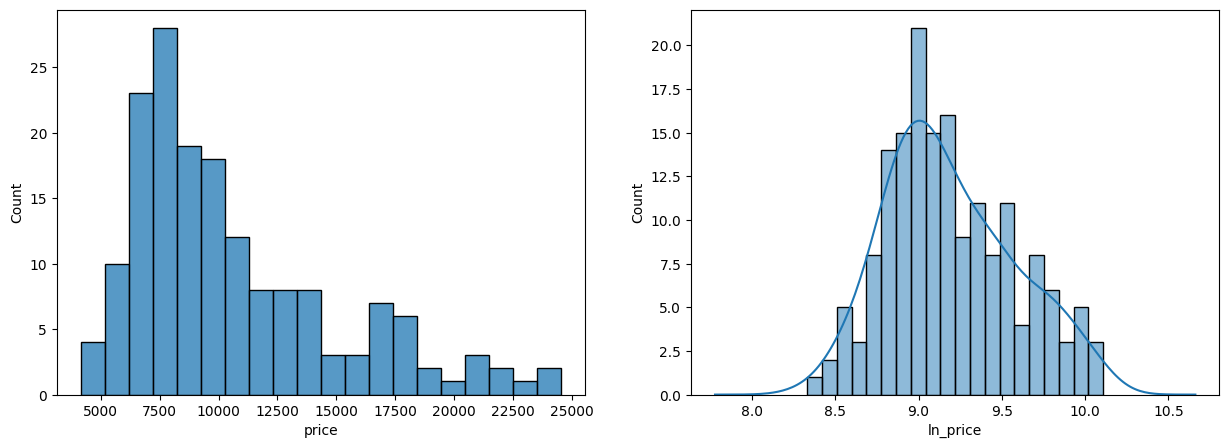

In [ ]:
# 종속변수를 자연로그로 변환 후 히스토그램으로 분포를 보면 정규분포화 된 것을 알 수 있음
# 자연로그화 한 ln_price 를 종속변수로 사용함

fig, axes = plt.subplots(1, 2,figsize=(15, 5))
sns.histplot(IQR_df['price'],ax=axes[0], bins=20)
sns.histplot(IQR_df['ln_price'], ax=axes[1], kde=True, bins=20, stat="count", kde_kws=dict(cut=4))

# 탐색적 데이터 분석
- 종속변수, 독립변수 각각에 대한 탐색
- 변수의 선택과 다중공선성에 발생 가능성에 대한 탐색을 위해 종속변수와 독립변수, 독립변수 간 상관관계 분석

## 기술통계

In [ ]:
# 변수들의 기초통계
IQR_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,ln_price
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,96.422619,0.833333,97.501786,171.042857,65.363095,53.543452,2402.220238,114.642857,3.292798,3.249286,9.917976,93.375000,5145.535714,26.613095,32.267857,10588.185518,9.190566
std,54.724514,1.197136,4.773711,10.662119,1.691209,2.401014,400.530613,25.065014,0.254175,0.289039,3.684377,28.589954,466.860785,6.221390,6.444116,4425.845819,0.385123
min,1.000000,-2.000000,86.600000,141.100000,60.300000,48.800000,1488.000000,61.000000,2.910000,2.190000,7.000000,48.000000,4150.000000,16.000000,20.000000,4151.000000,8.331105
25%,48.750000,0.000000,94.500000,165.300000,63.975000,51.600000,2073.250000,97.000000,3.050000,3.117500,8.700000,69.000000,4800.000000,23.000000,28.000000,7446.000000,8.915424
50%,98.500000,1.000000,96.300000,171.700000,65.400000,53.800000,2338.500000,109.000000,3.255000,3.270000,9.000000,88.000000,5200.000000,26.000000,32.000000,9245.500000,9.131891
75%,144.250000,2.000000,99.125000,176.650000,66.500000,55.125000,2663.250000,130.000000,3.470000,3.402500,9.400000,111.000000,5500.000000,31.000000,37.000000,12941.250000,9.468175
max,186.000000,3.000000,114.200000,198.900000,71.400000,59.800000,3430.000000,181.000000,3.940000,3.900000,23.000000,200.000000,6600.000000,49.000000,54.000000,24565.000000,10.109078


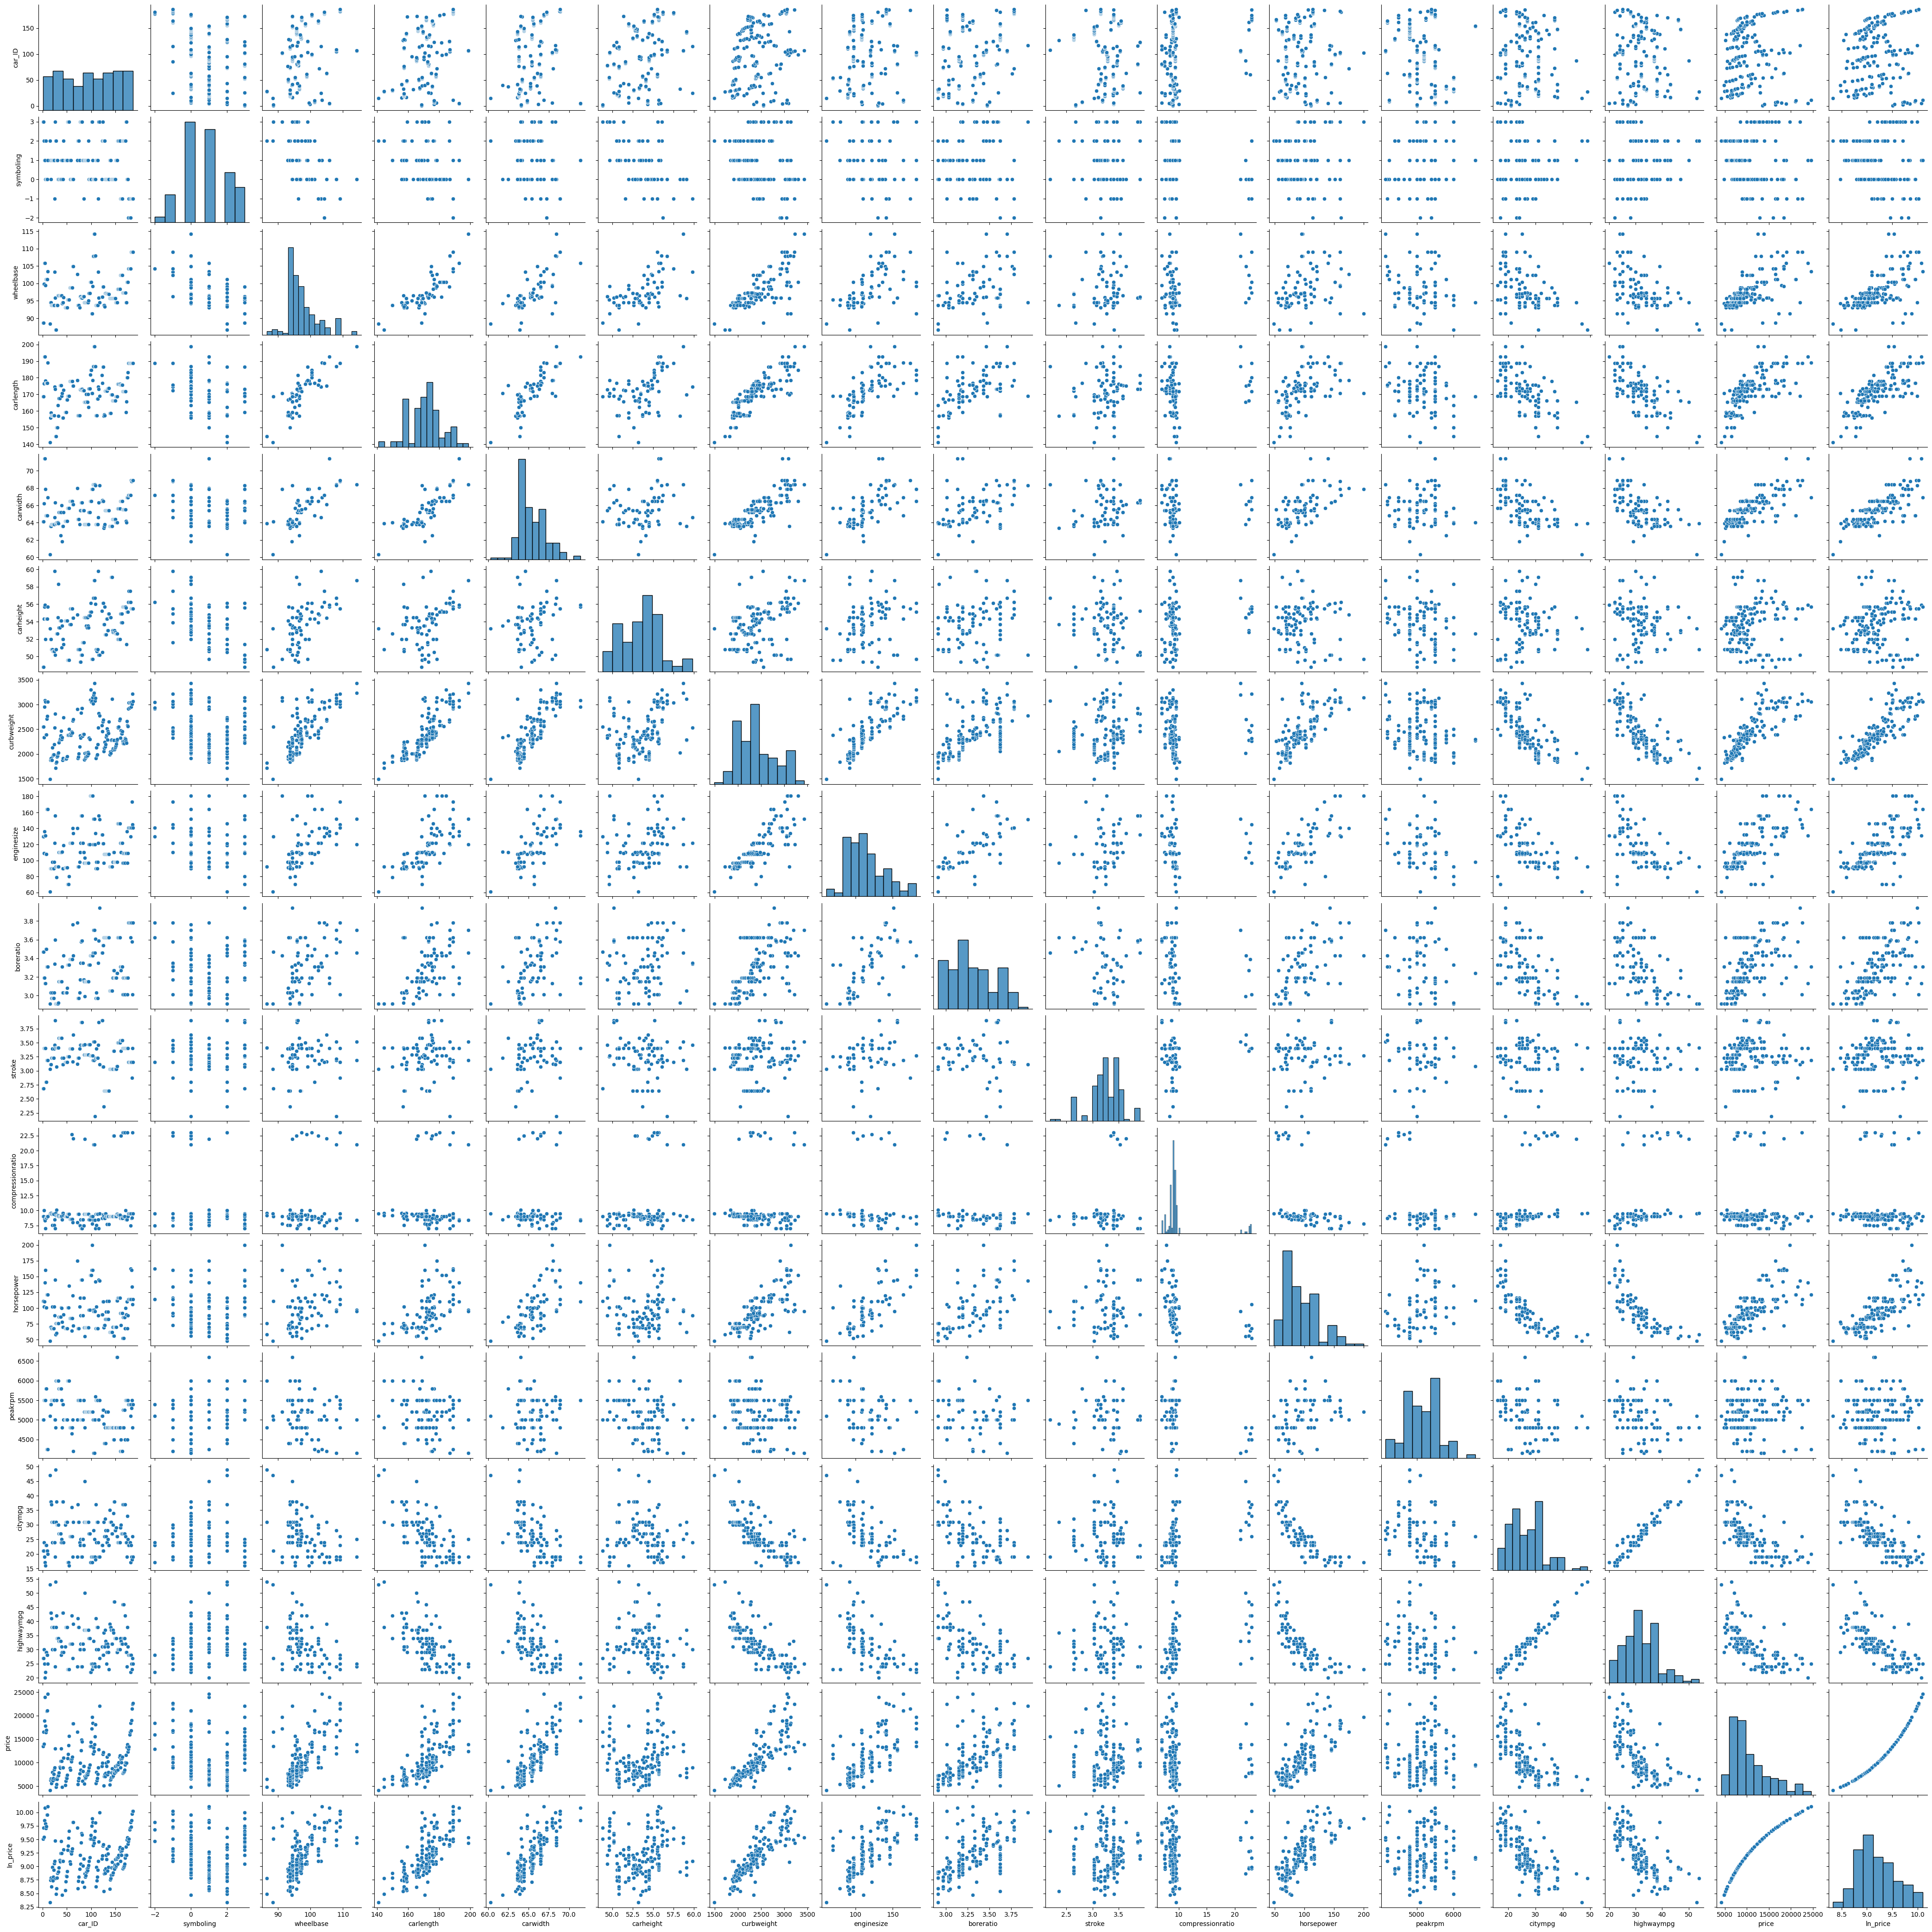

In [ ]:
sns.pairplot(data=IQR_df)

## 범주형 변수 탐색

In [ ]:
IQR_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 185
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            168 non-null    int64  
 1   symboling         168 non-null    int64  
 2   CompanyName       168 non-null    object 
 3   fueltype          168 non-null    object 
 4   aspiration        168 non-null    object 
 5   doornumber        168 non-null    object 
 6   carbody           168 non-null    object 
 7   drivewheel        168 non-null    object 
 8   enginelocation    168 non-null    object 
 9   wheelbase         168 non-null    float64
 10  carlength         168 non-null    float64
 11  carwidth          168 non-null    float64
 12  carheight         168 non-null    float64
 13  curbweight        168 non-null    int64  
 14  cylindernumber    168 non-null    object 
 15  enginesize        168 non-null    int64  
 16  boreratio         168 non-null    float64
 1

In [ ]:
categorical = ['CompanyName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'cylindernumber' ]
for i in range(len(categorical)):
    print('-----------',categorical[i],'------------\n', IQR_df.groupby(categorical[i]).size())

# 회사명의 경우 적은량의 변수가 너무 많아 변수로서 부적합
# cylindernumber 의 three, twelve, fuelsystem의 mfi, spfi는 모두 변수량이 1개로 너무 적어 모델에 사용 될 변수로 부적합
# enginelocation이 이상치 제거에 의해 front 변수가 하나밖에 안남아 의미가 없는 변수로 바뀜

----------- CompanyName ------------
 CompanyName
Nissan          1
alfa-romero     2
audi            4
bmw             5
chevrolet       3
dodge           9
honda          13
isuzu           4
mazda          17
mercury         1
mitsubishi     13
nissan         17
peugeot         6
plymouth        7
porsche         1
renault         2
saab            2
subaru         12
toyota         27
volkswagen     12
volvo          10
dtype: int64
----------- fueltype ------------
 fueltype
diesel     13
gas       155
dtype: int64
----------- aspiration ------------
 aspiration
std      141
turbo     27
dtype: int64
----------- doornumber ------------
 doornumber
four    94
two     74
dtype: int64
----------- carbody ------------
 carbody
convertible     3
hardtop         4
hatchback      64
sedan          77
wagon          20
dtype: int64
----------- drivewheel ------------
 drivewheel
4wd      8
fwd    114
rwd     46
dtype: int64
----------- enginelocation ------------
 enginelocation
front    

<Axes: xlabel='CompanyName', ylabel='price'>

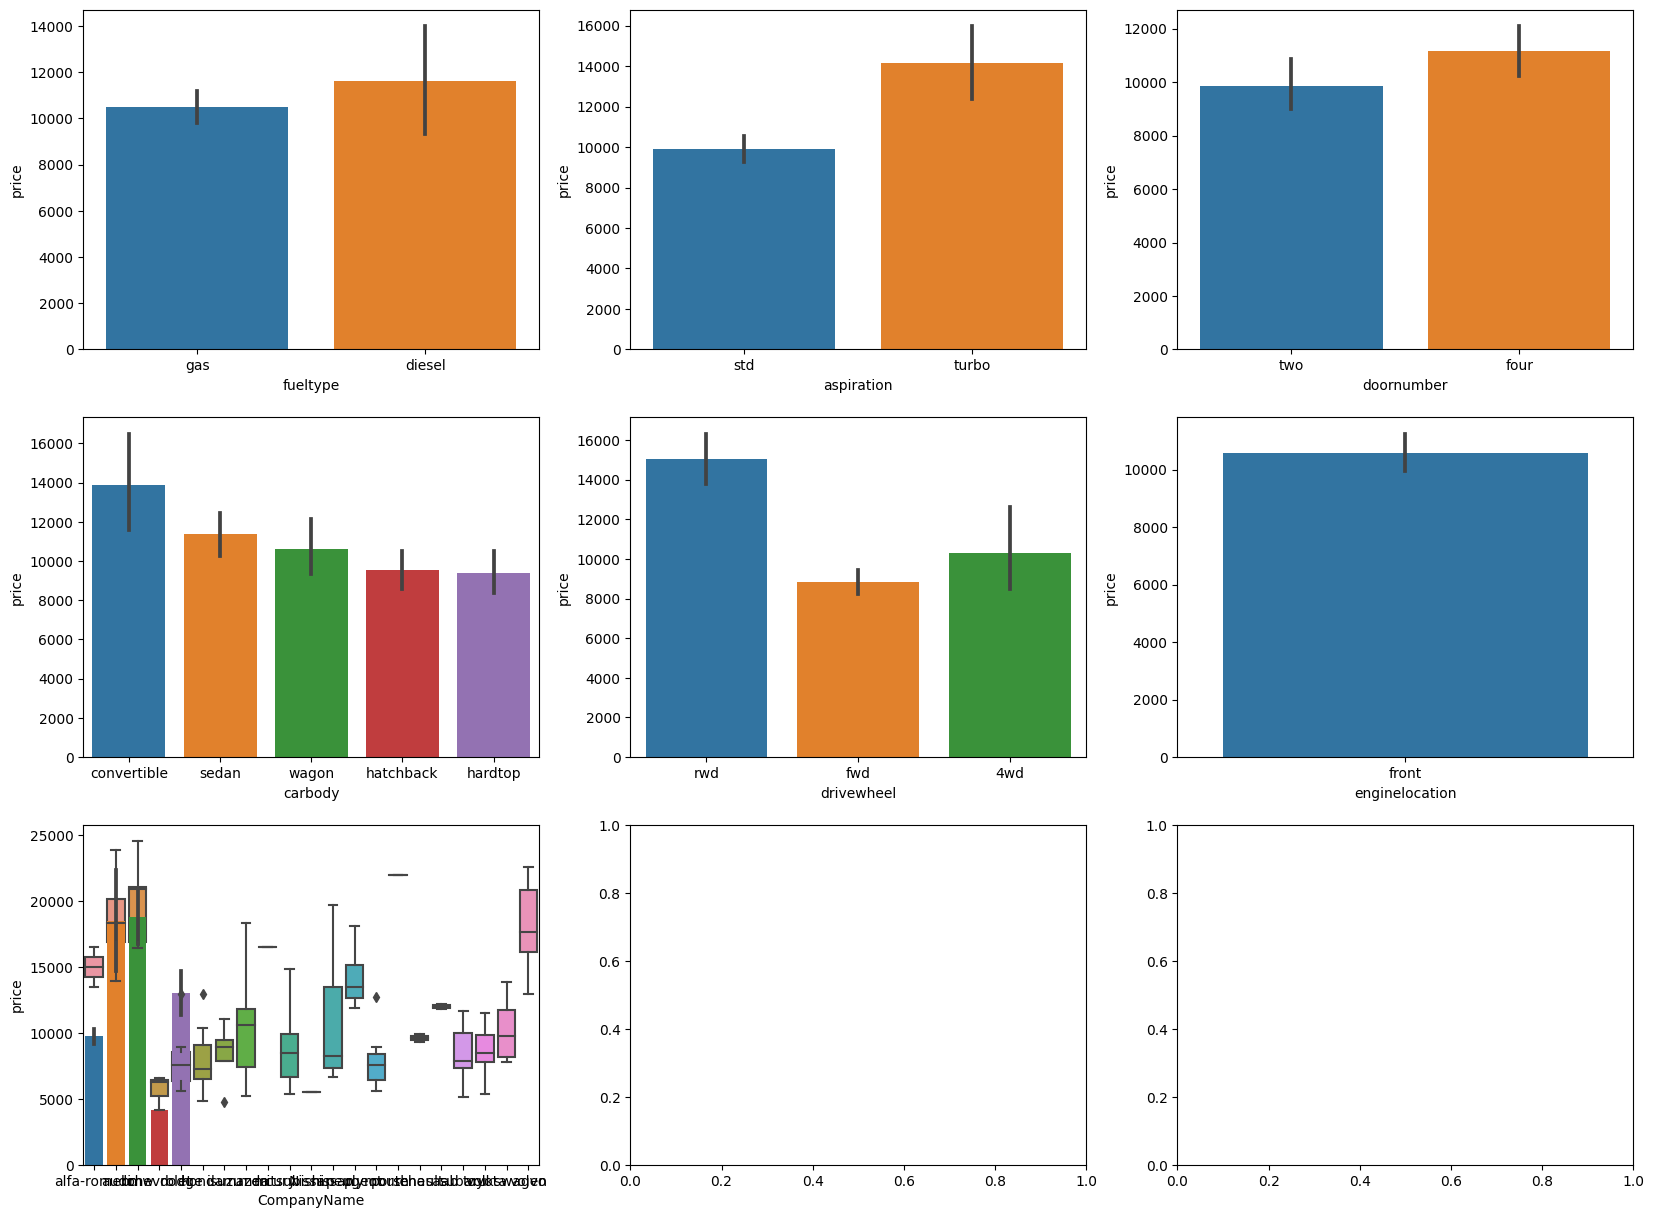

In [ ]:
# 범주형 변수 시각화

plt.subplots(3, 3,figsize=(20, 15))

plt.subplot(3, 3, 1)
sns.barplot(data=IQR_df,x='fueltype',y='price')
plt.subplot(3, 3, 2)
sns.barplot(data=IQR_df,x='aspiration',y='price')
plt.subplot(3, 3, 3)
sns.barplot(data=IQR_df,x='doornumber',y='price')
plt.subplot(3, 3, 4)
sns.barplot(data=IQR_df,x='carbody',y='price')
plt.subplot(3, 3, 5)
sns.barplot(data=IQR_df,x='drivewheel',y='price')
plt.subplot(3, 3, 6)
sns.barplot(data=IQR_df,x='enginelocation',y='price')
plt.subplot(3, 3, 7)
sns.barplot(data=IQR_df,x='cylindernumber',y='price')
plt.subplot(3, 3, 7)
sns.boxplot(data=IQR_df,x='CompanyName',y='price')

<Axes: xlabel='CompanyName', ylabel='price'>

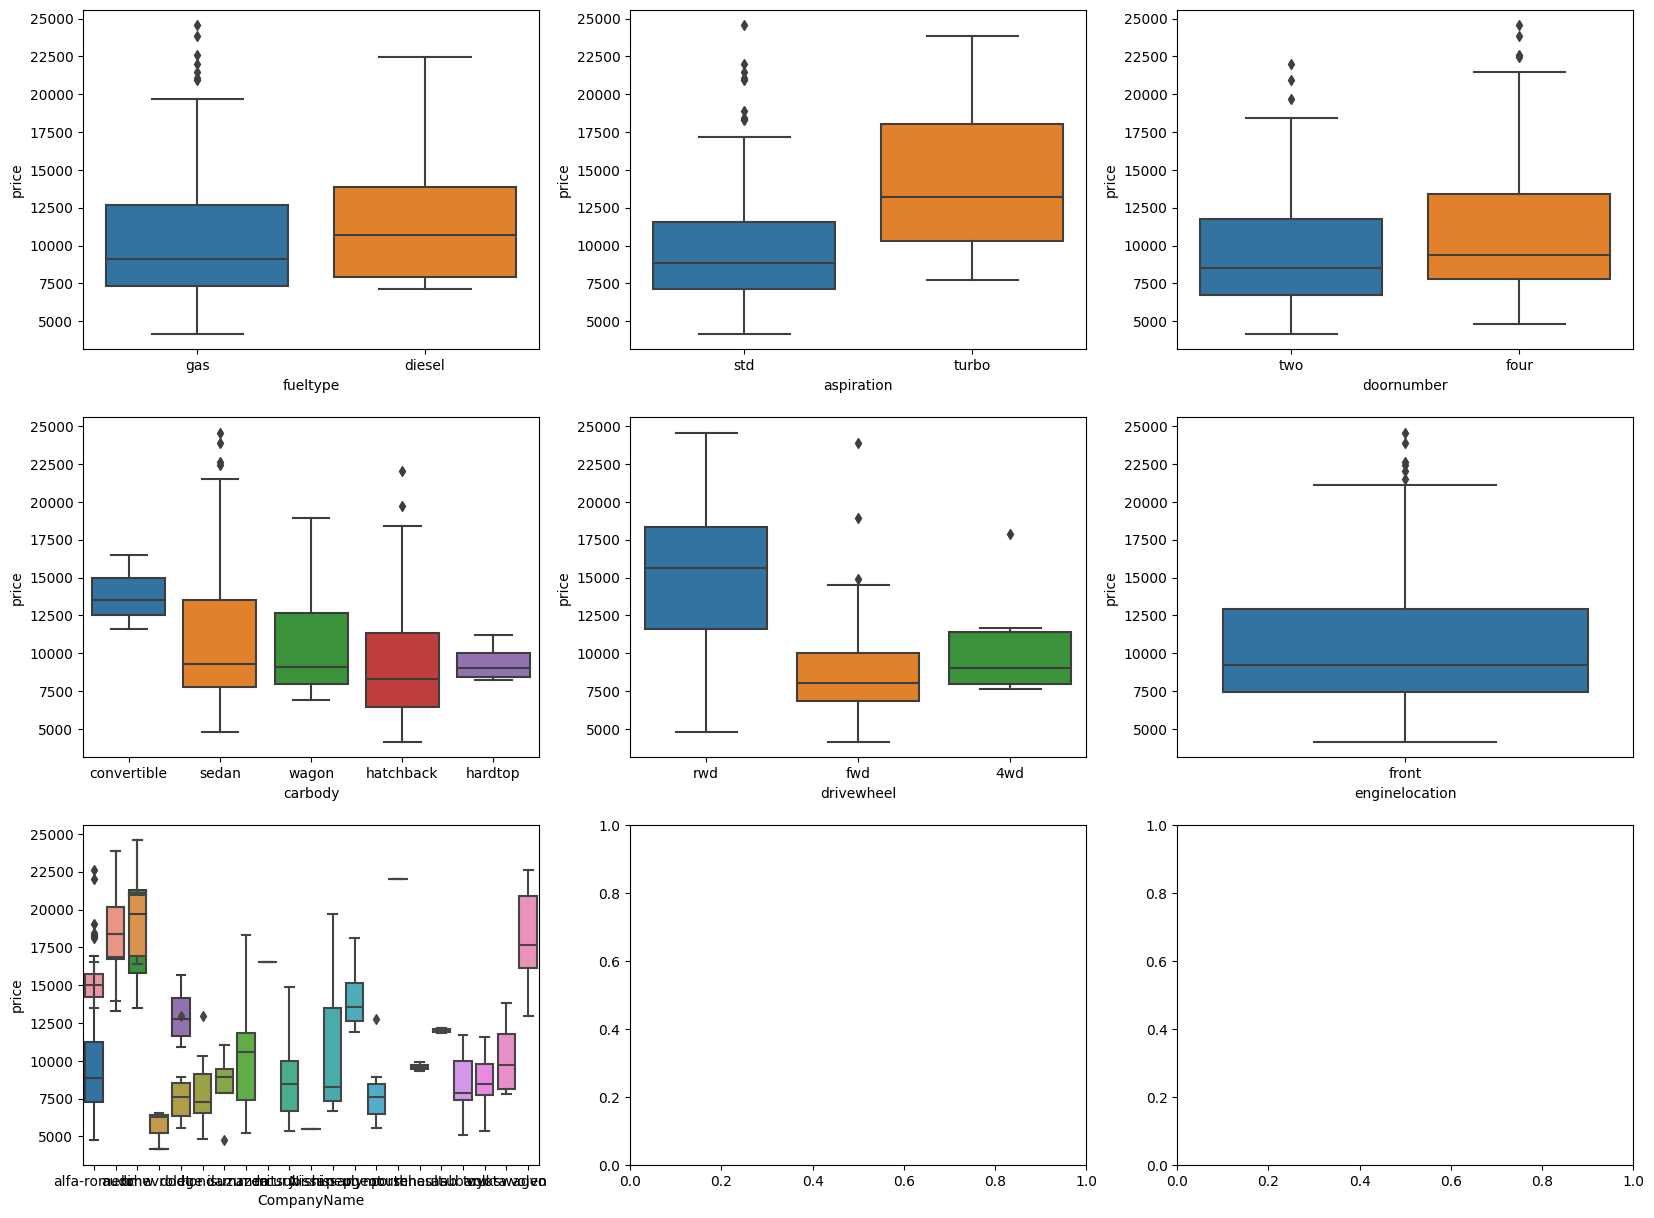

In [ ]:
# 이상치 탐색
plt.subplots(3, 3,figsize=(20, 15))

plt.subplot(3, 3, 1)
sns.boxplot(data=IQR_df,x='fueltype',y='price')
plt.subplot(3, 3, 2)
sns.boxplot(data=IQR_df,x='aspiration',y='price')
plt.subplot(3, 3, 3)
sns.boxplot(data=IQR_df,x='doornumber',y='price')
plt.subplot(3, 3, 4)
sns.boxplot(data=IQR_df,x='carbody',y='price')
plt.subplot(3, 3, 5)
sns.boxplot(data=IQR_df,x='drivewheel',y='price')
plt.subplot(3, 3, 6)
sns.boxplot(data=IQR_df,x='enginelocation',y='price')
plt.subplot(3, 3, 7)
sns.boxplot(data=IQR_df,x='cylindernumber',y='price')
plt.subplot(3, 3, 7)
sns.boxplot(data=IQR_df,x='CompanyName',y='price')

1. fuel type의 가스와 디젤은 가격대가 비슷함
2. doornumber 또한 가격대가 비슷하여 크게 영향을 안미침
3. aspiration - turbo가 std보다 훨씬 비쌈
4. carbody - convertible(오픈카로 변형되는거)이 전반적으로 가격이 높음
5. drivewheel - 후륜구동(rwd)가 비쌈
6. cylindernum의 three 표본수가 1개로 너무 적어 모델의 예측 학습에 악영향을 끼칠 수 있음, five와 six는 하나로 묶어서 봐도 됨
7. 이상치 제거에 의해 enginelocation의 변수가 하나로 바뀌어 의미없는 변수가 됨


#  추가 전처리
- 표본수가 1개인 데이터 제거


In [ ]:
df_modified = IQR_df[IQR_df['cylindernumber'] != 'three']
IQR_df.drop(labels = 'enginelocation' , axis=1)

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,ln_price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0,9.510075
1,2,3,alfa-romero,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0,9.711116
2,3,2,audi,gas,std,four,sedan,fwd,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0,9.543235
3,4,1,audi,gas,std,four,wagon,fwd,105.8,192.7,71.4,55.7,2954,five,136,3.19,3.40,8.5,110,5500,19,25,18920.0,9.847975
4,5,1,audi,gas,turbo,four,sedan,fwd,105.8,192.7,71.4,55.9,3086,five,131,3.13,3.40,8.3,140,5500,17,20,23875.0,10.080587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,182,-1,volvo,gas,std,four,sedan,rwd,109.1,188.8,68.9,55.5,2952,four,141,3.78,3.15,9.5,114,5400,23,28,16845.0,9.731809
182,183,-1,volvo,gas,turbo,four,sedan,rwd,109.1,188.8,68.8,55.5,3049,four,141,3.78,3.15,8.7,160,5300,19,25,19045.0,9.854560
183,184,-1,volvo,gas,std,four,sedan,rwd,109.1,188.8,68.9,55.5,3012,six,173,3.58,2.87,8.8,134,5500,18,23,21485.0,9.975110
184,185,-1,volvo,diesel,turbo,four,sedan,rwd,109.1,188.8,68.9,55.5,3217,six,145,3.01,3.40,23.0,106,4800,26,27,22470.0,10.019936


# 상관관계 분석
- 다중회귀모형을 위해 2개 이상의 독립변수를 선택
- 독립변수를 선택하는 기준은 이론적으로 통계적으로 가능하나, 실습에서는 우선 상관계수가 높은 변수를 독립변수로 선택

In [ ]:
# 수치형 독립 변수들과 종속변수의 상관관계 분석

corr_mt = IQR_df.corr(method='pearson')
pd.DataFrame(corr_mt)

<ipython-input-25-1c24090ce7ae>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mt = IQR_df.corr(method='pearson')


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,ln_price
car_ID,1.000000,-0.236565,0.308985,0.332728,0.235108,0.320916,0.244553,0.170579,0.343003,-0.108535,0.207220,0.041099,-0.282455,-0.057909,-0.076088,0.038910,0.092265
symboling,-0.236565,1.000000,-0.546697,-0.365924,-0.203583,-0.574739,-0.203495,-0.107363,-0.115353,0.135329,-0.109120,0.066395,0.190978,-0.035242,0.017465,-0.118032,-0.117516
wheelbase,0.308985,-0.546697,1.000000,0.841446,0.758711,0.605606,0.727945,0.515542,0.509761,0.049861,0.183058,0.369600,-0.228766,-0.443749,-0.476276,0.623209,0.640991
carlength,0.332728,-0.365924,0.841446,1.000000,0.817394,0.476802,0.854425,0.671035,0.642837,0.094125,0.104737,0.546254,-0.216753,-0.629964,-0.634381,0.695472,0.749570
carwidth,0.235108,-0.203583,0.758711,0.817394,1.000000,0.256575,0.819721,0.667591,0.560051,0.159205,0.092089,0.639085,-0.108396,-0.612195,-0.619299,0.759743,0.779531
carheight,0.320916,-0.574739,0.605606,0.476802,0.256575,1.000000,0.302995,0.123679,0.156154,-0.110951,0.209235,-0.107691,-0.274163,-0.025686,-0.070303,0.145112,0.156374
curbweight,0.244553,-0.203495,0.727945,0.854425,0.819721,0.302995,1.000000,0.822248,0.675725,0.104828,0.047783,0.765992,-0.177706,-0.750816,-0.766670,0.818092,0.852939
enginesize,0.170579,-0.107363,0.515542,0.671035,0.667591,0.123679,0.822248,1.000000,0.648616,0.233501,-0.035845,0.771704,-0.283883,-0.614749,-0.607245,0.708358,0.721515
boreratio,0.343003,-0.115353,0.509761,0.642837,0.560051,0.156154,0.675725,0.648616,1.000000,-0.184195,-0.113556,0.590752,-0.263835,-0.605529,-0.607697,0.533477,0.585328
stroke,-0.108535,0.135329,0.049861,0.094125,0.159205,-0.110951,0.104828,0.233501,-0.184195,1.000000,0.129986,0.153305,0.063322,-0.054017,-0.016839,0.029000,0.072532


<ipython-input-26-d642ae86fa22>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = IQR_df.corr(method='pearson'), annot=True, fmt = '.2f', linewidths=.5)


<Axes: >

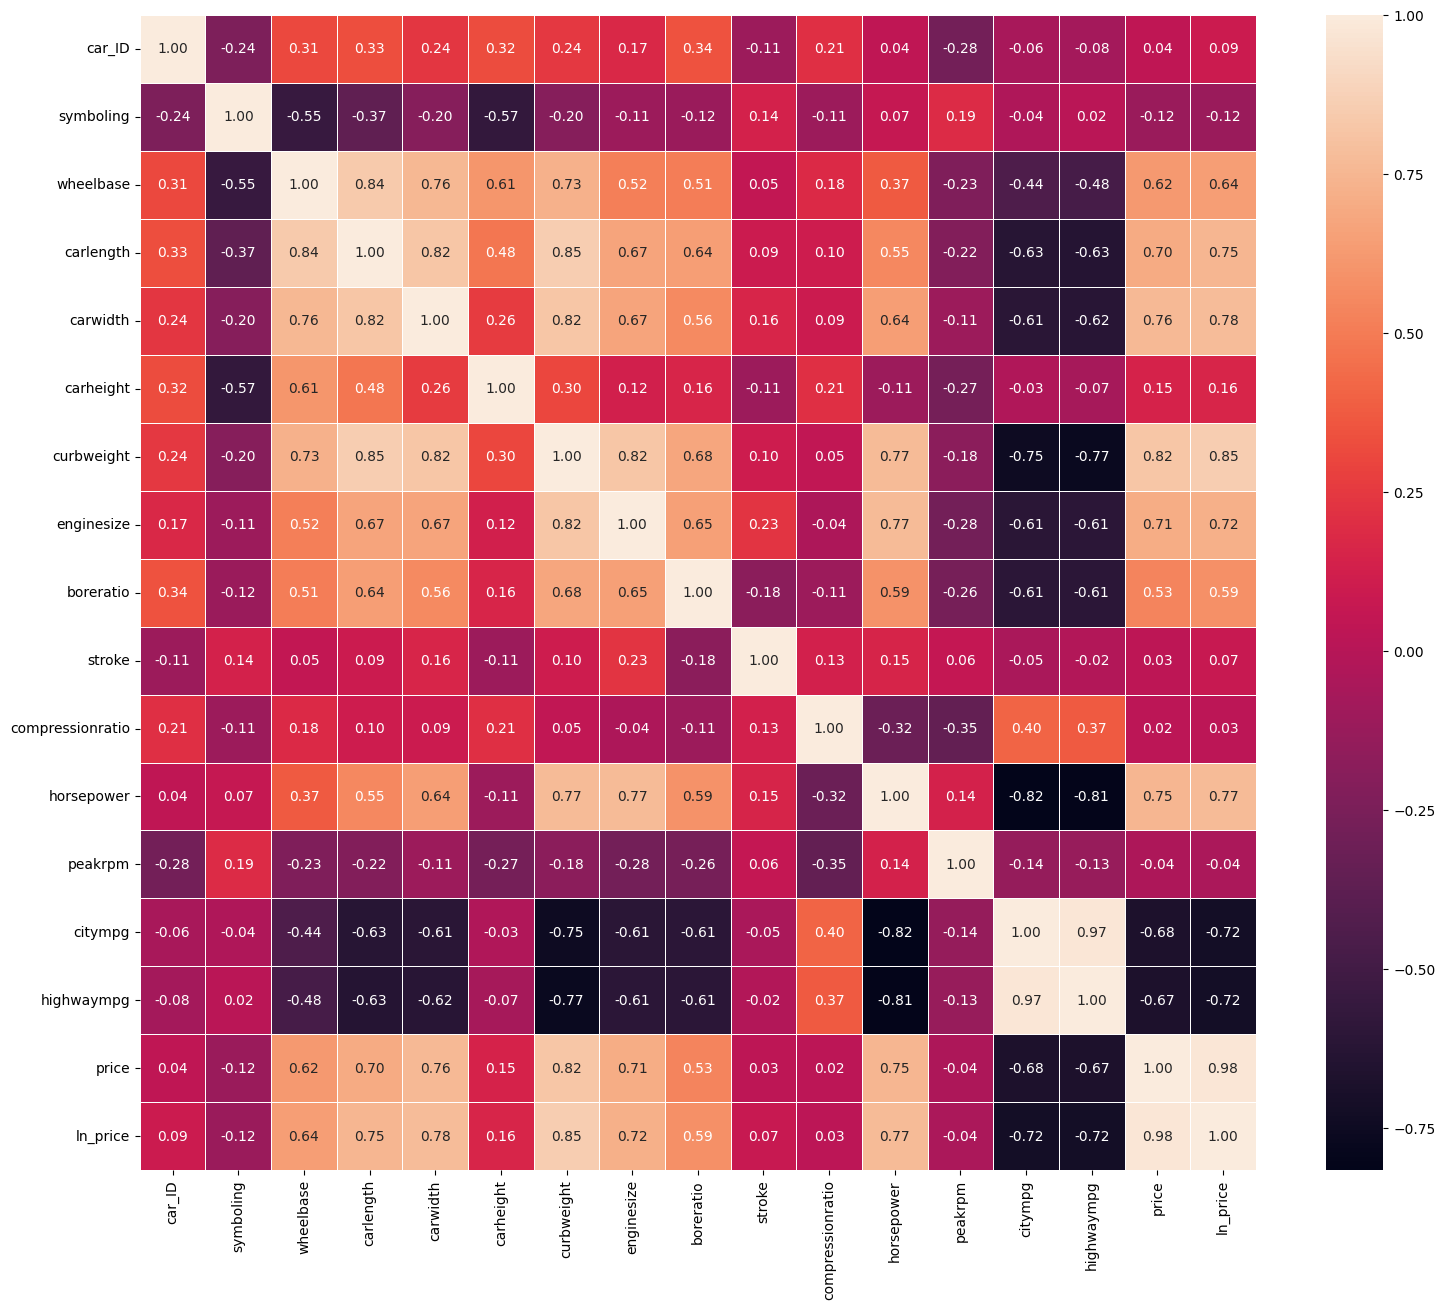

In [ ]:
# 히트맵으로 시각화 상관관계 시각화
plt.figure(figsize=(18,15))
sns.heatmap(data = IQR_df.corr(method='pearson'), annot=True, fmt = '.2f', linewidths=.5)

- 상관관계의 높음 기준을 0.65로 정하여 판단.
- 위 상관계수(+히트맵)을 통해 연속형 변수 중 highwaympg, citympg, horsepower, enginesize, curbweight, carwidth, carlength 가 종속변수인 price와 상관관계가 높음을 파악

<ipython-input-27-71e98d4fa2a6>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, col.index(i)+1)


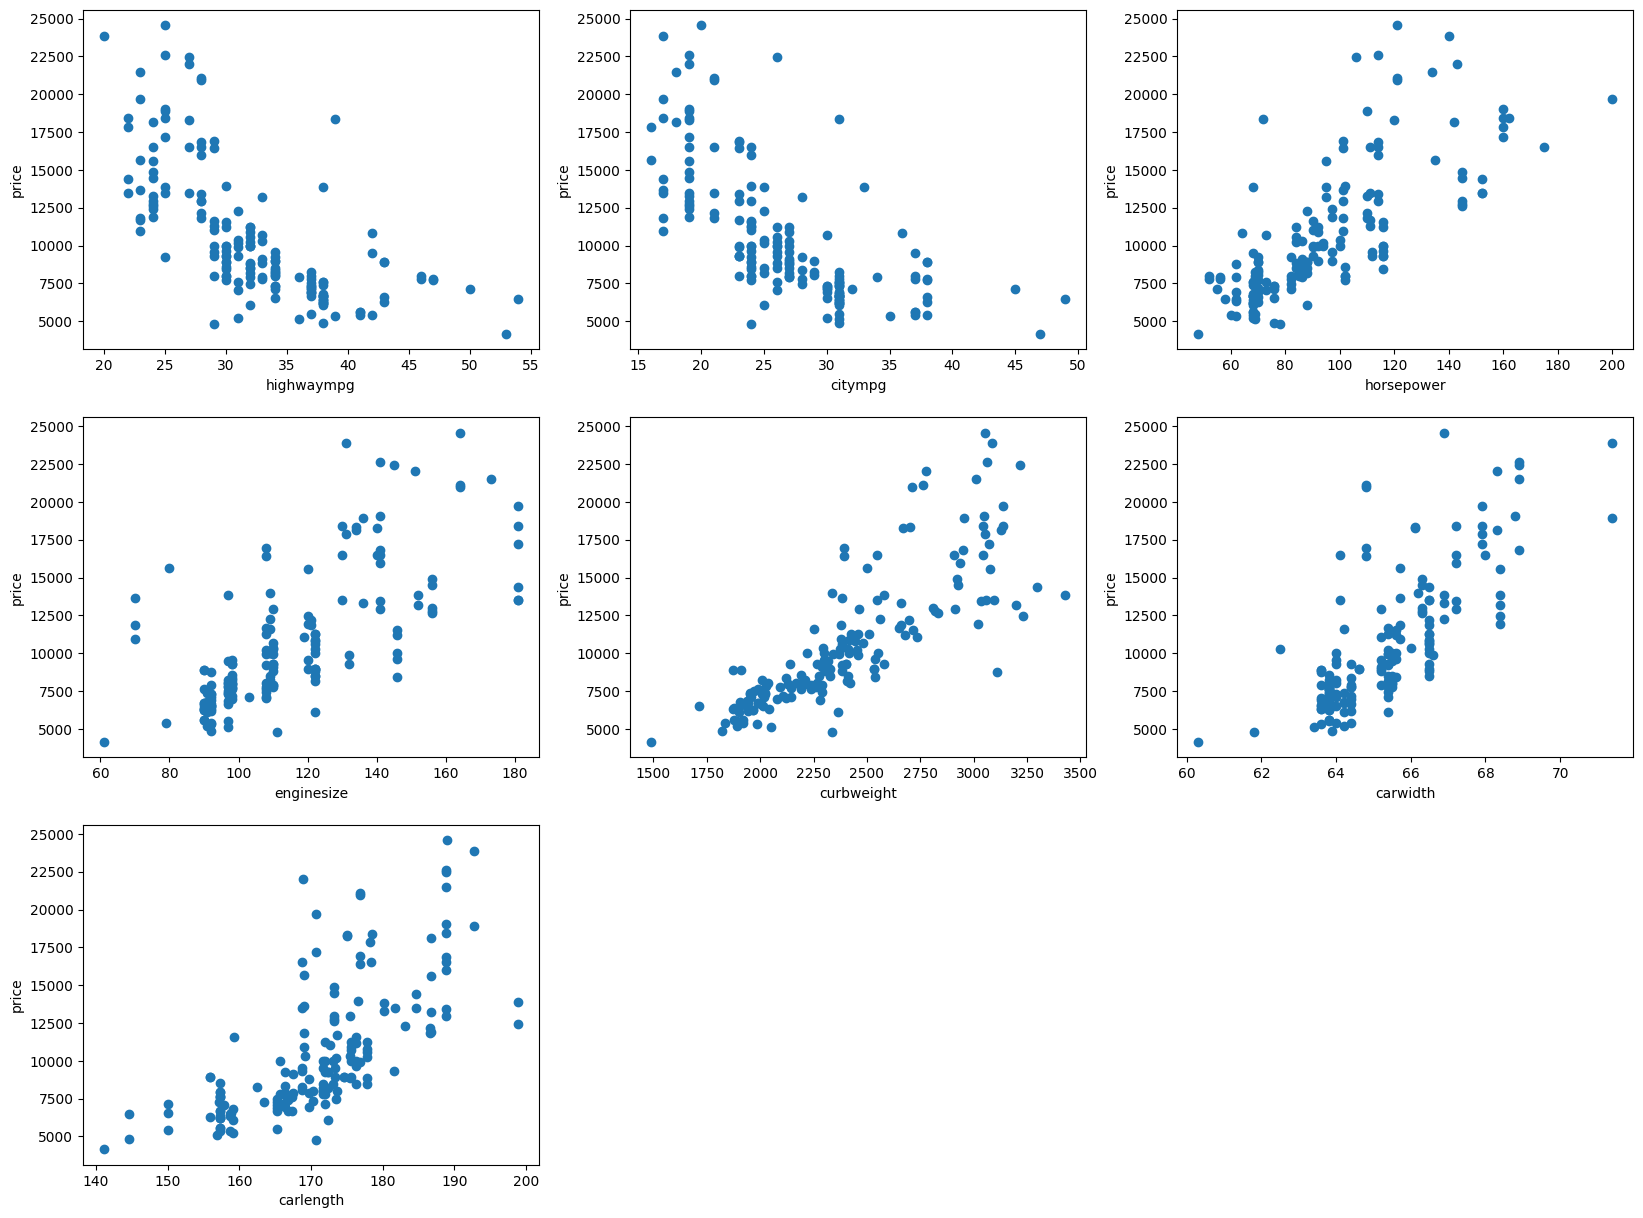

In [ ]:
plt.subplots(2, 3,figsize=(20, 15))

col = ['highwaympg','citympg','horsepower','enginesize','curbweight','carwidth', 'carlength']

for i in col:
    plt.subplot(3, 3, col.index(i)+1)
    plt.xlabel(i)
    plt.ylabel('price')
    plt.scatter(x=IQR_df[i], y=IQR_df['price'])

# 범주형 변수 더미변수 생성
- 범주형 변수 시각화 후, fueltype, doornumber, enginelocation 을 제외한 나머지 변수를 더미변수로 생성
- pd.get_dummies 함수를 통해 생성

In [ ]:
one_hot_v = ['aspiration','carbody','drivewheel','cylindernumber']

In [ ]:
dummies = pd.get_dummies(IQR_df[one_hot_v])
dummies

,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_two
0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0
1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0
2,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0
4,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0
182,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
183,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
184,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0


In [ ]:
# 더비변수 데이터프레임을 기존 데이터 프레임과 합치기
df_dum = pd.concat([IQR_df, dummies], axis = 1)
df_dum.drop(one_hot_v, axis = 1, inplace = True)
df_dum.shape

(168, 36)

In [ ]:
df_dum.head()

,car_ID,symboling,CompanyName,fueltype,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,ln_price,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_two
0,1,3,alfa-romero,gas,two,front,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,9.510075,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0
1,2,3,alfa-romero,gas,two,front,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,9.711116,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0
2,3,2,audi,gas,four,front,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,9.543235,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0
3,4,1,audi,gas,four,front,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,5500,19,25,18920.0,9.847975,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0
4,5,1,audi,gas,four,front,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875.0,10.080587,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0


In [ ]:
# 원핫 인코딩 된 더미 변수가 포함된 데이터 프레임 새로 저장
df_dum.to_csv('./data/df_dum.csv',index=False)

# 종속변수와 독립변수 선정
- 종속변수로 차량 가격을 로그변환한 변수인 ln_price 사용

- 연속형 변수
  - 상관관계 분석 결과 highwaympg, citympg, horsepower, enginesize, curbweight,carwidth, carlength 가 상관계수 0.65 이상으로 독립변수로 사용하기에 적절하다고 판단. (상관계수의 기준인 0.65는 하이퍼 파라미터로 연구자가 선정)

- 범주형 변수
  - 현재 초기 모델에 사용될 범주형 변수가 많아 연속형 변수만 독립변수로 선정하여 만든 모델에 범주형 변수를 하나씩 추가하여 adj.R-square 값을 확인하며 선정

- 모델 생성 후 변수 간 다중공선성이 발생할 수 있어 추후 확인 예정

# 회귀 모델 모형 생성

In [ ]:
import statsmodels.api as sm

## 연속형 변수 선택

In [ ]:
# 상수항 만들기
y = df_dum.loc[:,'ln_price']
X = df_dum.loc[:,['highwaympg','citympg','horsepower','enginesize','curbweight','carwidth', 'carlength']]

x_constant = sm.add_constant(X)

In [ ]:
x_constant

,const,highwaympg,citympg,horsepower,enginesize,curbweight,carwidth,carlength
0,1.0,27,21,111,130,2548,64.1,168.8
1,1.0,27,21,111,130,2548,64.1,168.8
2,1.0,30,24,102,109,2337,66.2,176.6
3,1.0,25,19,110,136,2954,71.4,192.7
4,1.0,20,17,140,131,3086,71.4,192.7
...,...,...,...,...,...,...,...,...
181,1.0,28,23,114,141,2952,68.9,188.8
182,1.0,25,19,160,141,3049,68.8,188.8
183,1.0,23,18,134,173,3012,68.9,188.8
184,1.0,27,26,106,145,3217,68.9,188.8


In [ ]:
# 다중선형회귀모형 설정
mreg_model = sm.OLS(endog=y,exog=x_constant)
# fit 함수를 통해 설정한 모형을 실행(계수 추정)
mreg_fit = mreg_model.fit()
# summary 함수를 통해 결과 확인
print(mreg_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     83.04
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           5.39e-50
Time:                        02:19:38   Log-Likelihood:                 51.210
No. Observations:                 168   AIC:                            -86.42
Df Residuals:                     160   BIC:                            -61.43
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3748      0.862      5.075      0.0

### 다중공선성 진단
   >VIF 지수를 통해 다중공선성 진단

In [ ]:
# 다중공선성 검정을 위한 라이브러리 모듈 불러오기
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# vif를 계산하는 variance_inflation_factor 함수는 매트릭스를 넣어주어야한다. 
# 따라서 상수항까지 모함된 독립변수들이 들어있는 데이터 프레임을 value 함수를 이용해 매트릭스로 변환하여 mreg_mt 로 저장
mreg_mt = x_constant.values

In [ ]:
# 6개 독립변수의 vif 값을 보면 highwaympg와 citympg의 경우 10 이상, 나머지 변수들은 이하로 VIF의 일반적인 기준에 따르면 다중공선성에 있어 문제가 생길 것으로 판단됨. 또한, curbweight 또한 9.3으로 10에 너무 가까워 문제가 생길 수 있다고 판단

print("highwaympg의 vif=",variance_inflation_factor(mreg_mt, 1))
print("citympg의 vif=",variance_inflation_factor(mreg_mt, 2))
print("horsepower의 vif=",variance_inflation_factor(mreg_mt, 3))
print("enginesize의 vif=",variance_inflation_factor(mreg_mt, 4))
print("curbweight의 vif=",variance_inflation_factor(mreg_mt, 5))
print("carwidth의 vif=",variance_inflation_factor(mreg_mt, 6))
print("carlength의 vif=",variance_inflation_factor(mreg_mt, 7))

highwaympg의 vif= 20.954811494103684
citympg의 vif= 20.742402102608736
horsepower의 vif= 5.659179925544292
enginesize의 vif= 4.188225781987075
curbweight의 vif= 9.382084589821426
carwidth의 vif= 3.8255105907663265
carlength의 vif= 5.430756716145129


### 모형 수정

In [ ]:
# 다중공선성 문제로 인한 모형 수정
X=X.drop(['highwaympg', 'citympg', 'curbweight'], axis=1)

In [ ]:
# 새로운 상수항 생성
x_constant = sm.add_constant(X)

In [ ]:
# 다중선형회귀모형 재설정
mreg_model = sm.OLS(endog=y,exog=x_constant)
mreg_fit = mreg_model.fit()
# summary 함수를 통해 결과 재확인
print(mreg_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     130.8
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           8.23e-50
Time:                        02:19:38   Log-Likelihood:                 43.185
No. Observations:                 168   AIC:                            -76.37
Df Residuals:                     163   BIC:                            -60.75
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1357      0.801      3.915      0.0

- enginesize의 p밸류(유의확률) 값이 유의수준인 0.05보다 커 종속변수에 무의미한 변수임을 확인하여 독립변수에서 제거

In [ ]:
X=X.drop(['enginesize'], axis=1)

In [ ]:
x_constant = sm.add_constant(X)

In [ ]:
# 다중선형회귀모형 재설정
mreg_model = sm.OLS(endog=y,exog=x_constant)
mreg_fit = mreg_model.fit()
# summary 함수를 통해 결과 재확인
print(mreg_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     175.3
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           6.27e-51
Time:                        02:19:38   Log-Likelihood:                 43.088
No. Observations:                 168   AIC:                            -78.18
Df Residuals:                     164   BIC:                            -65.68
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0928      0.793      3.901      0.0

In [ ]:
mreg_mt = x_constant.values

vif_result_lt = [ variance_inflation_factor(mreg_mt,i) for i in range(1,4)]

# vif 계산결과를 깔끔하게 보기 위해
# vif 계산결과와 독립변수의 이름을 가지고 판다스 데이터 프레임으로 만들어 보기 
pd.DataFrame({'vars':['horsepower', 'carwidth', 'carlength'], 'VIF':vif_result_lt})

,vars,VIF
0,horsepower,1.695335
1,carwidth,3.584135
2,carlength,3.022022


## 범주형 변수 선택
  >연속형 변수를 통해 만든 모델에 범주형 변수를 하나씩 추가하며 어떤 변수의 adj_r2square 값이 높은지를 탐색 <br>
  >신빙성 있는 모델 생성을 위해 범주형 변수를 하나씩 추가하며 확인

1. fuel type의 가스와 디젤은 가격대가 비슷함
2. doornumber 또한 가격대가 비슷하여 크게 영향을 안미침
3. aspiration - turbo가 std보다 훨씬 비쌈
4. carbody - convertible(오픈카로 변형되는거)이 전반적으로 가격이 높음
5. drivewheel - 후륜구동(rwd)가 비쌈
6. cylindernum의 three 표본수가 1개로 너무 적어 모델의 예측 학습에 악영향을 끼칠 수 있음, five와 six는 하나로 묶어서 봐도 됨
7. 이상치 제거에 의해 enginelocation의 변수가 하나로 바뀌어 의미없는 변수가 됨


In [ ]:
dummies.columns

Index(['aspiration_std', 'aspiration_turbo', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_two'],
      dtype='object')

### 하나씩 추가

In [ ]:
# aspiration 추가
X_test1 = pd.concat([X, dummies[['aspiration_std']]], axis = 1)
x_constant_test1 = sm.add_constant(X_test1)
mreg_model_test1 = sm.OLS(endog=y,exog=x_constant_test1)
mreg_fit_test1 = mreg_model_test1.fit()

print('aspiration adj.R2= %0.2f' % mreg_fit_test1.rsquared_adj)

aspiration adj.R2= 0.76


In [ ]:
mreg_mt_tes1 = x_constant_test1.values

vif_result_lt = [ variance_inflation_factor(mreg_mt_tes1,i) for i in range(1,5)]

pd.DataFrame({'vars':['horsepower', 'carwidth', 'carlength', 'aspiration_std'], 'VIF':vif_result_lt})

,vars,VIF
0,horsepower,1.930947
1,carwidth,3.683792
2,carlength,3.096338
3,aspiration_std,1.320190


In [ ]:
# drivewheel
X_test2 = pd.concat([X, dummies[['drivewheel_rwd', 'drivewheel_4wd']]], axis = 1)
x_constant_test2 = sm.add_constant(X_test2)
mreg_model_test2 = sm.OLS(endog=y,exog=x_constant_test2)
mreg_fit_test2 = mreg_model_test2.fit()

print('drivewheel adj.R2= %0.2f' % mreg_fit_test2.rsquared_adj)

drivewheel adj.R2= 0.79


In [ ]:
mreg_mt_tes2 = x_constant_test2.values

vif_result_lt = [ variance_inflation_factor(mreg_mt_tes2,i) for i in range(1,6)]

pd.DataFrame({'vars':['horsepower', 'carwidth', 'carlength', 'drivewheel_rwd', 'drivewheel_4wd'], 'VIF':vif_result_lt})

,vars,VIF
0,horsepower,1.953918
1,carwidth,3.645214
2,carlength,3.234572
3,drivewheel_rwd,1.492835
4,drivewheel_4wd,1.033849


In [ ]:
# carbody - convertible 외에는 모두 묶음
X_test3 = pd.concat([X, dummies[['carbody_convertible']]], axis = 1)
x_constant_test3 = sm.add_constant(X_test3)
mreg_model_test3 = sm.OLS(endog=y,exog=x_constant_test3)
mreg_fit_test3 = mreg_model_test3.fit()

print('carbody adj.R2= %0.2f' % mreg_fit_test3.rsquared_adj)

carbody adj.R2= 0.78


In [ ]:
mreg_mt_tes3 = x_constant_test3.values

vif_result_lt = [ variance_inflation_factor(mreg_mt_tes3,i) for i in range(1,5)]

pd.DataFrame({'vars':['horsepower', 'carwidth', 'carlength', 'carbody_convertible'], 'VIF':vif_result_lt})

,vars,VIF
0,horsepower,1.732735
1,carwidth,3.642505
2,carlength,3.022511
3,carbody_convertible,1.032476


In [ ]:
# cylindernumber - five와 six를 하나로 묶어 아닌것은 five, six로 판단
X_test4 = pd.concat([X, dummies[['cylindernumber_four', 'cylindernumber_two']]], axis = 1)
x_constant_test4 = sm.add_constant(X_test4)
mreg_model_test4 = sm.OLS(endog=y,exog=x_constant_test4)
mreg_fit_test4 = mreg_model_test4.fit()

print('cylindernumber adj.R2= %0.2f' % mreg_fit_test4.rsquared_adj)

cylindernumber adj.R2= 0.77


In [ ]:
mreg_mt_test4 = x_constant_test4.values

vif_result_lt = [ variance_inflation_factor(mreg_mt_test4,i) for i in range(1,6)]

pd.DataFrame({'vars':['horsepower', 'carwidth', 'carlength', 'cylindernumber_four', 'cylindernumber_two'], 'VIF':vif_result_lt})

,vars,VIF
0,horsepower,1.937884
1,carwidth,3.642112
2,carlength,3.073263
3,cylindernumber_four,1.590181
4,cylindernumber_two,1.252376


- 각 변수를 추가한 모델 분석결과 aspiration, drivewheel, carbody, cylindernumber 네변수를 추가한 각각의 모델의 adj.R2값이 0.76, 0.79, 0.78, 0.77 이고, 다중 공선성 진단에서 문제가 없어 독립변수 후보로 추가

### 두개씩 추가

In [ ]:
# aspiration, drivewheel 추가
X_test5 = pd.concat([X, dummies[['aspiration_std', 'drivewheel_rwd', 'drivewheel_4wd']]], axis = 1)
x_constant_test5 = sm.add_constant(X_test5)
mreg_model_test5 = sm.OLS(endog=y,exog=x_constant_test5)
mreg_fit_test5 = mreg_model_test5.fit()

print('adj.R2= %0.2f' % mreg_fit_test5.rsquared_adj)

adj.R2= 0.78


In [ ]:
mreg_mt_test5 = x_constant_test5.values

vif_result_lt = [ variance_inflation_factor(mreg_mt_test5,i) for i in range(1,7)]

pd.DataFrame({'vars':['horsepower', 'carwidth', 'carlength', 'aspiration_std', 'drivewheel_rwd', 'drivewheel_4wd'], 'VIF':vif_result_lt})

,vars,VIF
0,horsepower,2.273804
1,carwidth,3.743314
2,carlength,3.285678
3,aspiration_std,1.385110
4,drivewheel_rwd,1.524558
5,drivewheel_4wd,1.054144


In [ ]:
# aspiration, carbody 추가 - carbody에서 carbody_convertible을 제외한 나머지를 묶음
X_test6 = pd.concat([X, dummies[['aspiration_std', 'carbody_convertible']]], axis = 1)
x_constant_test6 = sm.add_constant(X_test6)
mreg_model_test6 = sm.OLS(endog=y,exog=x_constant_test6)
mreg_fit_test6 = mreg_model_test6.fit()

print('adj.R2= %0.2f' % mreg_fit_test6.rsquared_adj)

adj.R2= 0.78


In [ ]:
mreg_mt_test6 = x_constant_test6.values

vif_result_lt = [ variance_inflation_factor(mreg_mt_test6,i) for i in range(1,6)]

pd.DataFrame({'vars':['horsepower', 'carwidth', 'carlength', 'aspiration_std', 'carbody_convertible'], 'VIF':vif_result_lt})

,vars,VIF
0,horsepower,1.985490
1,carwidth,3.730750
2,carlength,3.096338
3,aspiration_std,1.328939
4,carbody_convertible,1.039319


In [ ]:
# aspiration, cylindernumber  추가
X_test7 = pd.concat([X, dummies[['aspiration_std', 'cylindernumber_four', 'cylindernumber_two']]], axis = 1)
x_constant_test7 = sm.add_constant(X_test7)
mreg_model_test7 = sm.OLS(endog=y,exog=x_constant_test7)
mreg_fit_test7 = mreg_model_test7.fit()

print('adj.R2= %0.2f' % mreg_fit_test7.rsquared_adj)

adj.R2= 0.77


In [ ]:
mreg_mt_test7 = x_constant_test7.values

vif_result_lt = [ variance_inflation_factor(mreg_mt_test7,i) for i in range(1,7)]

pd.DataFrame({'vars':['horsepower', 'carwidth', 'carlength', 'aspiration_std', 'cylindernumber_four', 'cylindernumber_two'], 'VIF':vif_result_lt})

,vars,VIF
0,horsepower,2.330451
1,carwidth,3.794167
2,carlength,3.188333
3,aspiration_std,1.413743
4,cylindernumber_four,1.669111
5,cylindernumber_two,1.253944


In [ ]:
# drivewheel, carbody
X_test8 = pd.concat([X, dummies[['drivewheel_rwd', 'drivewheel_4wd', 'carbody_convertible']]], axis = 1)
x_constant_test8 = sm.add_constant(X_test8)
mreg_model_test8 = sm.OLS(endog=y,exog=x_constant_test8)
mreg_fit_test8 = mreg_model_test8.fit()

print('adj.R2= %0.2f' % mreg_fit_test8.rsquared_adj)

adj.R2= 0.80


In [ ]:
mreg_mt_test8 = x_constant_test8.values

vif_result_lt = [ variance_inflation_factor(mreg_mt_test8,i) for i in range(1,7)]

pd.DataFrame({'vars':['horsepower', 'carwidth', 'carlength', 'drivewheel_rwd', 'drivewheel_4wd', 'carbody_convertible'], 'VIF':vif_result_lt})

,vars,VIF
0,horsepower,1.971231
1,carwidth,3.694276
2,carlength,3.235638
3,drivewheel_rwd,1.517228
4,drivewheel_4wd,1.034172
5,carbody_convertible,1.050985


In [ ]:
# drivewheel, cylindernumber
X_test9 = pd.concat([X, dummies[['drivewheel_rwd', 'drivewheel_4wd', 'cylindernumber_four', 'cylindernumber_two']]], axis = 1)
x_constant_test9 = sm.add_constant(X_test9)
mreg_model_test9 = sm.OLS(endog=y,exog=x_constant_test9)
mreg_fit_test9 = mreg_model_test9.fit()

print('adj.R2= %0.2f' % mreg_fit_test9.rsquared_adj)

adj.R2= 0.80


In [ ]:
mreg_mt_test9 = x_constant_test9.values

vif_result_lt = [ variance_inflation_factor(mreg_mt_test9,i) for i in range(1,8)]

pd.DataFrame({'vars':['horsepower', 'carwidth', 'carlength', 'drivewheel_rwd', 'drivewheel_4wd', 'cylindernumber_four', 'cylindernumber_two'], 'VIF':vif_result_lt})

,vars,VIF
0,horsepower,2.209371
1,carwidth,3.715098
2,carlength,3.347653
3,drivewheel_rwd,1.628353
4,drivewheel_4wd,1.034640
5,cylindernumber_four,1.597165
6,cylindernumber_two,1.361426


In [ ]:
# carbody, cylindernumber
X_test10 = pd.concat([X, dummies[['carbody_convertible', 'cylindernumber_four', 'cylindernumber_two']]], axis = 1)
x_constant_test10 = sm.add_constant(X_test10)
mreg_model_test10 = sm.OLS(endog=y,exog=x_constant_test10)
mreg_fit_test10 = mreg_model_test10.fit()

print('adj.R2= %0.2f' % mreg_fit_test10.rsquared_adj)

adj.R2= 0.79


In [ ]:
mreg_mt_test10 = x_constant_test10.values

vif_result_lt = [ variance_inflation_factor(mreg_mt_test10,i) for i in range(1,7)]

pd.DataFrame({'vars':['horsepower', 'carwidth', 'carlength', 'carbody_convertible', 'cylindernumber_four', 'cylindernumber_two'], 'VIF':vif_result_lt})

,vars,VIF
0,horsepower,1.990280
1,carwidth,3.692658
2,carlength,3.073320
3,carbody_convertible,1.037873
4,cylindernumber_four,1.596998
5,cylindernumber_two,1.252376


- 두개의 변수를 (aspiration, drivewheel), (aspiration, carbody), (aspiration, cylindernumber), (drivewheel, carbody), (drivewheel, cylindernumber), (carbody, cylindernumber) 순으로 추가하여 adj.R-square 값과 다중공선성을 검증해본 결과, <br>
연속형 변수들의 VIF값이 증가한 테스트 모델이 있지만, 10 이하 이므로 크게 문제가 되지는 않음<br>
adj.R-square 값은 모두 증가함

### 세개씩 추가

In [ ]:
# aspiration, drivewheel, carbody 추가
X_test11 = pd.concat([X, dummies[['aspiration_std', 'drivewheel_rwd', 'drivewheel_4wd', 'carbody_convertible']]], axis = 1)
x_constant_test11 = sm.add_constant(X_test11)
mreg_model_test11 = sm.OLS(endog=y,exog=x_constant_test11)
mreg_fit_test11 = mreg_model_test11.fit()

print('adj.R2= %0.2f' % mreg_fit_test11.rsquared_adj)

adj.R2= 0.80


In [ ]:
mreg_mt_test11 = x_constant_test11.values

vif_result_lt = [ variance_inflation_factor(mreg_mt_test11,i) for i in range(1,8)]

pd.DataFrame({'vars':['horsepower', 'carwidth', 'carlength', 'aspiration_std', 'drivewheel_rwd', 'drivewheel_4wd', 'carbody_convertible'], 'VIF':vif_result_lt})

,vars,VIF
0,horsepower,2.301024
1,carwidth,3.784728
2,carlength,3.287791
3,aspiration_std,1.389877
4,drivewheel_rwd,1.545876
5,drivewheel_4wd,1.054238
6,carbody_convertible,1.054602


In [ ]:
# aspiration, drivewheel, cylindernumber 추가
X_test12 = pd.concat([X, dummies[['aspiration_std', 'drivewheel_rwd', 'drivewheel_4wd', 'cylindernumber_four', 'cylindernumber_two']]], axis = 1)
x_constant_test12 = sm.add_constant(X_test12)
mreg_model_test12 = sm.OLS(endog=y,exog=x_constant_test12)
mreg_fit_test12 = mreg_model_test12.fit()

print('adj.R2= %0.2f' % mreg_fit_test12.rsquared_adj)

adj.R2= 0.80


In [ ]:
mreg_mt_test12 = x_constant_test12.values

vif_result_lt = [ variance_inflation_factor(mreg_mt_test12,i) for i in range(1,9)]

pd.DataFrame({'vars':['horsepower', 'carwidth', 'carlength', 'aspiration_std', 'drivewheel_rwd', 'drivewheel_4wd', 'cylindernumber_four', 'cylindernumber_two'], 'VIF':vif_result_lt})

,vars,VIF
0,horsepower,2.705271
1,carwidth,3.868170
2,carlength,3.434144
3,aspiration_std,1.480605
4,drivewheel_rwd,1.655235
5,drivewheel_4wd,1.058497
6,cylindernumber_four,1.689574
7,cylindernumber_two,1.361523


In [ ]:
# aspiration, carbody, cylindernumber 추가
X_test13 = pd.concat([X, dummies[['aspiration_std', 'carbody_convertible', 'cylindernumber_four', 'cylindernumber_two']]], axis = 1)
x_constant_test13 = sm.add_constant(X_test13)
mreg_model_test13 = sm.OLS(endog=y,exog=x_constant_test13)
mreg_fit_test13 = mreg_model_test13.fit()

print('adj.R2= %0.2f' % mreg_fit_test13.rsquared_adj)

adj.R2= 0.79


In [ ]:
mreg_mt_test13 = x_constant_test13.values

vif_result_lt = [ variance_inflation_factor(mreg_mt_test13,i) for i in range(1,8)]

pd.DataFrame({'vars':['horsepower', 'carwidth', 'carlength', 'aspiration_std', 'carbody_convertible', 'cylindernumber_four', 'cylindernumber_two'], 'VIF':vif_result_lt})

,vars,VIF
0,horsepower,2.417572
1,carwidth,3.828599
2,carlength,3.189095
3,aspiration_std,1.428973
4,carbody_convertible,1.049054
5,cylindernumber_four,1.681693
6,cylindernumber_two,1.253956


In [ ]:
# drivewheel, carbody, cylindernumber 추가
X_test14 = pd.concat([X, dummies[['drivewheel_rwd', 'drivewheel_4wd', 'carbody_convertible', 'cylindernumber_four', 'cylindernumber_two']]], axis = 1)
x_constant_test14 = sm.add_constant(X_test14)
mreg_model_test14 = sm.OLS(endog=y,exog=x_constant_test14)
mreg_fit_test14 = mreg_model_test14.fit()

print('adj.R2= %0.2f' % mreg_fit_test14.rsquared_adj)

adj.R2= 0.81


In [ ]:
mreg_mt_test14 = x_constant_test14.values

vif_result_lt = [ variance_inflation_factor(mreg_mt_test14,i) for i in range(1,9)]

pd.DataFrame({'vars':['horsepower', 'carwidth', 'carlength', 'drivewheel_rwd', 'drivewheel_4wd', 'carbody_convertible', 'cylindernumber_four', 'cylindernumber_two'], 'VIF':vif_result_lt})

,vars,VIF
0,horsepower,2.234769
1,carwidth,3.754711
2,carlength,3.351475
3,drivewheel_rwd,1.660194
4,drivewheel_4wd,1.034882
5,carbody_convertible,1.059738
6,cylindernumber_four,1.602295
7,cylindernumber_two,1.363626


- 세개씩 추가 시 모두 adj.R-square 값이 증가하였고, 다중공선성 진단시 문제가 발생하지 않음

### 네개 모두 추가

In [ ]:
# drivewheel, carbody, fueltype 추가
X_test15 = pd.concat([X, dummies[['aspiration_std', 'drivewheel_rwd', 'drivewheel_4wd', 'carbody_convertible', 'cylindernumber_four', 'cylindernumber_two' ]]], axis = 1)
x_constant_test15 = sm.add_constant(X_test15)
mreg_model_test15 = sm.OLS(endog=y,exog=x_constant_test15)
mreg_fit_test15 = mreg_model_test15.fit()

print('adj.R2= %0.2f' % mreg_fit_test15.rsquared_adj)

adj.R2= 0.81


In [ ]:
mreg_mt_test15 = x_constant_test15.values

vif_result_lt = [ variance_inflation_factor(mreg_mt_test15,i) for i in range(1,10)]

pd.DataFrame({'vars':['horsepower', 'carwidth', 'carlength', 'aspiration_std', 'drivewheel_rwd', 'drivewheel_4wd', 'carbody_convertible', 'cylindernumber_four', 'cylindernumber_two'], 'VIF':vif_result_lt})

,vars,VIF
0,horsepower,2.752715
1,carwidth,3.896235
2,carlength,3.441578
3,aspiration_std,1.490619
4,drivewheel_rwd,1.682646
5,drivewheel_4wd,1.058505
6,carbody_convertible,1.066906
7,cylindernumber_four,1.698957
8,cylindernumber_two,1.363662


- aspiration, drivewheel, carbody, cylindernumber 네개의 변수를 모두 추가했을때, adj.R-square 값이 0.8로 높게 나왔으며, 다중공선성 진단에서도 모두 10 이하로 문제가 없는 것으로 판단됨.
- horsepower, enginesize, carwidth, carlength, aspiration, drivewheel, carbody, cylindernumber 총 8개의 연속형 변수와 독립형 변수로 채택

## 모델 생성

### 선정된 독립변수 추가한 모델 생성

In [ ]:
# 더미변수 이어 붙이기
X_cat = pd.concat([X, dummies[['aspiration_std', 'drivewheel_rwd', 'drivewheel_4wd', 'carbody_convertible', 'cylindernumber_four', 'cylindernumber_two']]], axis = 1)

In [ ]:
x_constant_cat = sm.add_constant(X_cat)

In [ ]:
# 다중선형회귀모형 설정
mreg_model_cat = sm.OLS(endog=y,exog=x_constant_cat)
# fit 함수를 통해 설정한 모형을 실행(계수 추정)
mreg_fit_cat = mreg_model_cat.fit()
# summary 함수를 통해 결과 확인
print(mreg_fit_cat.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     82.39
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           4.54e-55
Time:                        02:19:39   Log-Likelihood:                 68.521
No. Observations:                 168   AIC:                            -117.0
Df Residuals:                     158   BIC:                            -85.80
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.4600    

### 유의수준 0.05를 벗어난 변수 삭제

- aspiration_std, drivewheel_4wd, cylindernumber_two 세 변수의 회귀계수의 유의확률 값이 0.05 이상으로 유의수준보다 높아 종속변수에 유의미하지 않는 데이터일 수 있어 제거

In [ ]:
# 변수 제거
X_cat = X_cat.drop(['aspiration_std',  'drivewheel_4wd', 'cylindernumber_two'], axis=1)

In [ ]:
x_constant_cat = sm.add_constant(X_cat)

In [ ]:
# 다중선형회귀모형 설정
mreg_model_cat = sm.OLS(endog=y,exog=x_constant_cat)
# fit 함수를 통해 설정한 모형을 실행(계수 추정)
mreg_fit_cat = mreg_model_cat.fit()
# summary 함수를 통해 결과 확인
print(mreg_fit_cat.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     121.4
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           4.02e-57
Time:                        02:19:39   Log-Likelihood:                 65.988
No. Observations:                 168   AIC:                            -118.0
Df Residuals:                     161   BIC:                            -96.11
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.1792    

### 다중 공선성 검정

In [ ]:
mreg_mt_cat = x_constant_cat.values

vif_result_lt = [ variance_inflation_factor(mreg_mt_cat,i) for i in range(1,7)]

pd.DataFrame({'vars':['horsepower', 'carwidth', 'carlength', 'drivewheel_rwd', 'carbody_convertible', 'cylindernumber_four'], 'VIF':vif_result_lt})

,vars,VIF
0,horsepower,2.170834
1,carwidth,3.723850
2,carlength,3.268410
3,drivewheel_rwd,1.485121
4,carbody_convertible,1.057774
5,cylindernumber_four,1.309449


### 모형적합도와 잔차검정(가정 검정)
- 모형 적합도 
  - 6개의 독립변수를 사용한 다중선형회귀모형은 분산분석 결과 유의수준 0.05에서 적합한 모형으로 판단할 수 있음
  - 모형의 설명력(R-square)은 0.819 로 모형의 설명력이 높음
  - 독립변수의 수를 고려하여 조정된 결졍계수(Adj.R-squared)도 0.812 으로 독립변수가 종속변수에 대한 설명력이 좋다고 할 수 있음
- 회귀계수의 유의도
  - 회귀계수의 유의확률이 0.05보다 높은 변수를 제거하여 수정한 모델의 모든 회귀계수의 유의확률이 유의수준 0.05보다 작아 통계적으로 유의한 회귀계수임


In [ ]:
# 예측값 
predict = mreg_fit_cat.predict(x_constant_cat)

# 잔차
residual = y - predict

# 이상치 검정 통계량
influence_df = mreg_fit_cat.get_influence().summary_frame()
influence_df

,dfb_const,dfb_horsepower,dfb_carwidth,dfb_carlength,dfb_drivewheel_rwd,dfb_carbody_convertible,dfb_cylindernumber_four,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.036586,-0.008605,0.039798,-0.028316,-0.056265,-0.596464,-0.009320,0.058080,-0.891659,0.338343,-0.637619,-0.891089,-0.637211
1,0.024147,0.005679,-0.026267,0.018689,0.037135,0.393666,0.006151,0.025370,0.589317,0.338343,0.421416,0.588119,0.420559
2,-0.046281,0.062161,0.011480,0.049683,-0.128729,0.000794,0.066780,0.006360,1.685194,0.015436,0.211005,1.694968,0.212229
3,0.194112,0.115896,-0.172988,0.036213,0.075515,-0.046931,0.125536,0.010361,-0.586939,0.173910,-0.269303,-0.585740,-0.268753
4,-0.046314,-0.010870,0.040902,-0.010319,-0.027538,0.010701,-0.028387,0.000680,0.167449,0.145192,0.069011,0.166942,0.068803
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.012016,0.004815,-0.010114,0.002794,-0.007904,0.000347,-0.006062,0.000044,-0.074885,0.051892,-0.017519,-0.074653,-0.017465
182,0.032394,-0.050186,-0.023865,0.012786,-0.019512,0.010635,-0.055006,0.001450,-0.394005,0.061384,-0.100759,-0.392969,-0.100494
183,0.004068,0.003589,-0.003683,0.000069,-0.003032,-0.000460,0.008805,0.000026,-0.050669,0.065781,-0.013445,-0.050512,-0.013404
184,-0.115782,-0.174638,0.106121,-0.000415,0.088109,0.020780,-0.197125,0.012549,0.922368,0.093588,0.296381,0.921938,0.296243


In [ ]:
influence_df.describe()

,dfb_const,dfb_horsepower,dfb_carwidth,dfb_carlength,dfb_drivewheel_rwd,dfb_carbody_convertible,dfb_cylindernumber_four,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,1.680000e+02,168.000000,168.000000,168.000000,168.000000,168.000000
mean,-0.000611,-0.000174,0.000621,-0.000435,0.000147,0.000057,0.000326,8.129521e-03,-0.000508,0.041667,-0.000356,0.000742,-0.000086
std,0.123449,0.079331,0.126164,0.109862,0.104808,0.064561,0.096426,2.119299e-02,1.007957,0.051397,0.239264,1.018087,0.242154
min,-0.962471,-0.505833,-0.536264,-0.660584,-0.524913,-0.596464,-0.551801,2.968917e-07,-3.248588,0.009468,-1.159174,-3.350143,-1.195412
25%,-0.019327,-0.017732,-0.014894,-0.018228,-0.028330,-0.005842,-0.010998,2.044831e-04,-0.611432,0.015825,-0.101398,-0.610239,-0.101172
50%,0.001406,0.001825,-0.001582,-0.001640,-0.002775,0.000092,-0.000966,1.208891e-03,-0.040098,0.022619,-0.008845,-0.039973,-0.008817
75%,0.017790,0.019650,0.016970,0.018683,0.018373,0.005795,0.011695,5.557890e-03,0.456854,0.051892,0.074548,0.455729,0.074394
max,0.467066,0.261755,0.970958,0.468552,0.623230,0.393666,0.370710,1.919550e-01,3.355151,0.353374,0.835840,3.468158,0.848024


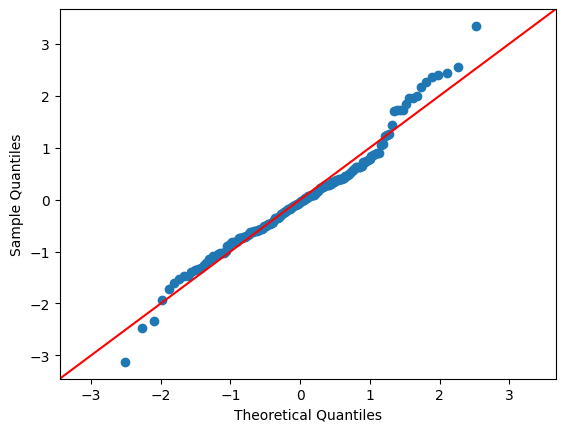

In [ ]:
# 잔차가 정규분포를 따른다면 이상적인 분포(붉은 대각선)을 따라야함
# 잔차가 작은 지점에서 이상적분포(붉은 대각선)에서 많이 벗어난 점들이 보여
# 잔차(관측값 - 예측값)가 작은 곳 즉 실제 가격 보다 예측 가격이 더 큰 점들이 존재하는 것으로 보임
# 또한, 잔차가 높은곳에 예측가격이 실제 가격보다 더 큰 점들이 존재

sm.qqplot(residual,line='45', fit=True)
plt.show() # plt.show()가 없으면 그래프 두개가 그려짐

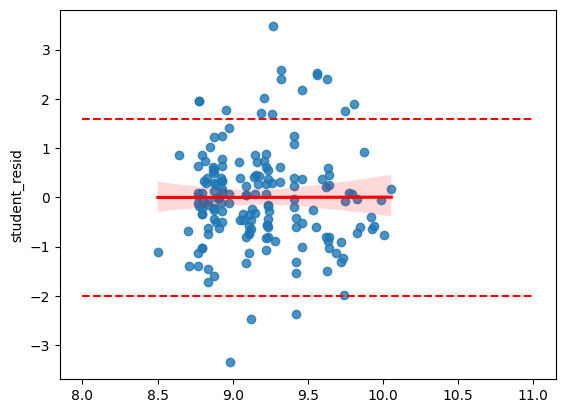

In [ ]:
# 예측값- 스튜던트화잔차 그래프 해석
# 독립성 검정: 전반적으로 예측값의 잔차가 무작위적으로 분포되어 있는 것으로 보여 독립성 가정을 만족하는 것으로 볼 수 있음
# 등분산성 검정: 전반적으로 예측값의 잔차도 일정한 분산을 나타내는 것으로 보여 대체적으로 등분산성 가정도 만족하는 것으로 볼 수 있음

# 단, 관측값이 예측값보다 커 가격이 실제 가격이 높은 이상치가 많은것으로 보임
# 가격이 높은 차량에서 잔차가 음수(-)를 보이는 것은 예측값에 비해 실제 가격이 낮은 차량이 존재하는 것을 의미함
# 이상치 확인 및 제거가 필요함
sns.regplot(x=predict, y=influence_df['student_resid'],line_kws={'color': 'red'})
plt.hlines(y=1.6,xmin=8,xmax=11,color='red',linestyle='--')
plt.hlines(y=-2.0,xmin=8,xmax=11,color='red',linestyle='--')

## 3. 이상치 검정
   >이상치 제거를 단순선형회귀분석의 기준과 같은 기준으로 우선 제거

In [ ]:
# 원본 데이터는 남기기 위해 원본데이터(df)를 복사한 df_1을 만들고, 
# 표본에서 이상치를 제거하기 위해 df_1에 잔차검정통계량 데이터프레임에 있는 스튜던트화 잔차를 새로운 열로 삽입
mreg_df_1 = df_dum.copy()
mreg_df_1['studentized_ext'] = influence_df['student_resid']
mreg_df_1.head()
mreg_df_1.shape

(168, 37)

In [ ]:
# 즉 스튜던트화 잔차가 - 2 보다 작거나, +1.6보다 큰 차량가격을 이상치로 판단하고 제거함
# loc 함수를 이용해서 스튜던트화 잔차가 -2이상 ~ +1.6 이하 인 차량들만 선택함

# 이상치를 제거 한 후 표본은 168개에서 150개로 줄어듬 (18개의 차량 삭제)
# 모형에 따라(독립변수에 따라) 예측값이 바뀌기 때문에 잔차가 바뀌고 그러면서 이상치도 달라질 것
mreg_df_1 = mreg_df_1.loc[(mreg_df_1['studentized_ext'] >= -2) & (mreg_df_1['studentized_ext'] <= 1.6),:]
mreg_df_1.shape #(기존 168, 37 -> 150, 37)

(150, 37)

### 이상치 제거 자료 저장

In [ ]:
# 이상치를 제거한 자료 데이터 프레임을 mreg_df_outlier.csv 로 저장
mreg_df_1.to_csv('./data/mreg_df_outlier.csv',index=False)

## 모형 수정(2차 모형)

In [ ]:
# 저장한 데이터 불러올때
df_outlier = pd.read_csv('./data/mreg_df_outlier.csv')

### 2차 모형 생성 및 해석

In [ ]:
# 이상치를 제거한 자료인 mreg_df_outlier를 이용한 분석

y_outlier = df_outlier.loc[:, 'ln_price']
x_outlier = df_outlier.loc[:,['horsepower', 'carwidth', 'carlength', 'drivewheel_rwd', 'carbody_convertible', 'cylindernumber_four']]

x_constant_outlier = sm.add_constant(x_outlier)

mreg_model_outlier = sm.OLS(endog=y_outlier,exog=x_constant_outlier)
mreg_fit_outlier = mreg_model_outlier.fit()
print(mreg_fit_outlier.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     227.6
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           1.51e-70
Time:                        02:19:40   Log-Likelihood:                 119.92
No. Observations:                 150   AIC:                            -225.8
Df Residuals:                     143   BIC:                            -204.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.0054    

- R-squared : 0.905
- Adj.R-squared : 0.901
- F-statistic : 227.6
- Prob (F-statistic): 1.51e-70

### 2차 모형 이상치 검정

In [ ]:
# 예측값
predict_outlier = mreg_fit_outlier.predict(x_constant_outlier)

# 잔차
residual_outlier = y_outlier - predict_outlier

# 이상치 검정 통계량
influence_df_outlier = mreg_fit_outlier.get_influence().summary_frame()
influence_df_outlier

,dfb_const,dfb_horsepower,dfb_carwidth,dfb_carlength,dfb_drivewheel_rwd,dfb_carbody_convertible,dfb_cylindernumber_four,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.063243,-0.012701,0.066241,-0.050260,-0.082602,-0.721204,0.000011,0.088830,-1.097802,0.340349,-0.788549,-1.098596,-0.789120
1,0.064765,0.013006,-0.067834,0.051469,0.084589,0.738555,-0.000011,0.093117,1.123982,0.340349,0.807355,1.125026,0.808104
2,0.215478,0.130365,-0.195078,0.065967,0.087110,-0.059863,0.110965,0.012689,-0.586210,0.205385,-0.298030,-0.584860,-0.297344
3,-0.145315,-0.038131,0.131123,-0.050576,-0.084857,0.038858,-0.067973,0.006402,0.465293,0.171500,0.211696,0.464014,0.211114
4,-0.006954,0.042903,0.007975,-0.006990,-0.052649,0.005667,-0.050100,0.001525,0.317906,0.095531,0.103318,0.316904,0.102992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.038090,0.094115,-0.050117,0.041531,0.029803,-0.027366,0.055118,0.002844,0.483328,0.078534,0.141102,0.482029,0.140723
146,-0.089178,-0.036951,0.078071,-0.033868,0.061788,-0.003229,0.051749,0.002532,0.506672,0.064580,0.133129,0.505351,0.132782
147,0.010090,-0.013213,-0.008289,0.005835,-0.007136,0.003296,-0.016270,0.000120,-0.104031,0.072005,-0.028978,-0.103670,-0.028878
148,-0.045120,-0.064086,0.039214,0.009446,0.066051,0.003199,-0.152673,0.007909,0.813495,0.077196,0.235287,0.812528,0.235007


In [ ]:
influence_df_outlier.describe()

,dfb_const,dfb_horsepower,dfb_carwidth,dfb_carlength,dfb_drivewheel_rwd,dfb_carbody_convertible,dfb_cylindernumber_four,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,1.500000e+02,150.000000,150.000000,150.000000,150.000000,150.000000
mean,-0.000704,-0.000404,0.000705,-0.000530,0.000443,0.000045,0.000594,7.802769e-03,-0.001179,0.046667,-0.002968,-0.001693,-0.003036
std,0.086306,0.091387,0.089362,0.097437,0.083658,0.087037,0.097076,1.657330e-02,1.004062,0.056653,0.234472,1.009913,0.235742
min,-0.356433,-0.490888,-0.392165,-0.398211,-0.250427,-0.721204,-0.548599,1.426131e-08,-2.429130,0.010506,-0.788549,-2.472164,-0.789120
25%,-0.016989,-0.021722,-0.022516,-0.026855,-0.030991,-0.008580,-0.018387,3.376072e-04,-0.611876,0.017133,-0.105690,-0.610533,-0.105665
50%,0.000639,0.000470,-0.000279,0.000037,-0.002085,-0.000272,-0.001233,1.878383e-03,0.005131,0.025810,0.000653,0.005113,0.000650
75%,0.025753,0.024136,0.021130,0.023234,0.021195,0.006972,0.018434,6.315321e-03,0.676659,0.061525,0.117545,0.675372,0.117509
max,0.264206,0.385516,0.362429,0.588419,0.318849,0.738555,0.450607,9.822506e-02,2.381920,0.361395,0.829202,2.422112,0.843193


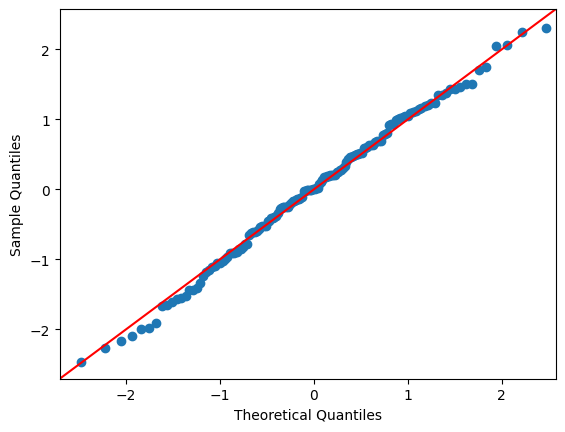

In [ ]:
sm.qqplot(residual_outlier,line='45', fit=True)
plt.show()

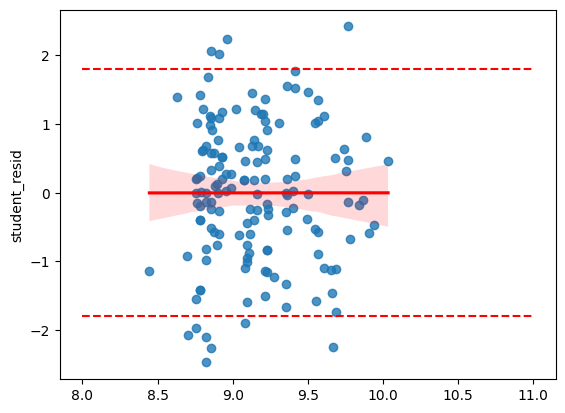

In [ ]:
sns.regplot(x=predict_outlier, y=influence_df_outlier['student_resid'],line_kws={'color': 'red'})
plt.hlines(y=1.8,xmin=8,xmax=11,color='red',linestyle='--')
plt.hlines(y=-1.8,xmin=8,xmax=11,color='red',linestyle='--')

# 결과 해석

In [ ]:
print('1차 모형 적합도(F-test)의 p_value= %f' % mreg_fit_cat.f_pvalue)
print('2차 모형 적합도(F-test)의 p_value= %f' % mreg_fit_outlier.f_pvalue)

1차 모형 적합도(F-test)의 p_value= 0.000000
2차 모형 적합도(F-test)의 p_value= 0.000000


In [ ]:
print('연속형 변수 모형 adj.R2= %0.2f' % mreg_fit.rsquared_adj)
print('1차 모형 adj.R2= %0.2f' % mreg_fit_cat.rsquared_adj)
print('2차 모형 adj.R2= %0.2f' % mreg_fit_outlier.rsquared_adj)

연속형 변수 모형 adj.R2= 0.76
1차 모형 adj.R2= 0.81
2차 모형 adj.R2= 0.90


In [ ]:
pd.DataFrame({'1st model coef': mreg_fit_cat.params, # 1차 모형의 회귀계수
              '1st model p_value': mreg_fit_cat.pvalues, # 1차 모형 회귀계수의 유의확률
              '2nd model coef' : mreg_fit_outlier.params, # 2차 모형의 회귀계수
              '2nd model p_value' : mreg_fit_outlier.pvalues, # 2차 모형 회귀계수의 유의확률
             }) 

,1st model coef,1st model p_value,2nd model coef,2nd model p_value
const,3.179241,1.786088e-05,3.005395,8.270653e-07
horsepower,0.003925,2.106345e-08,0.004240,3.600175e-16
carwidth,0.062602,3.632146e-05,0.065440,2.755328e-07
carlength,0.009633,1.969532e-05,0.009144,3.247681e-07
drivewheel_rwd,0.146155,5.298306e-05,0.079345,2.792421e-03
carbody_convertible,0.392059,1.302843e-04,0.441900,9.545032e-10
cylindernumber_four,-0.160807,5.334787e-04,-0.126027,2.769896e-04


# 결론

In [ ]:
# 1차 모형
print(mreg_fit_cat.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     121.4
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           4.02e-57
Time:                        02:19:41   Log-Likelihood:                 65.988
No. Observations:                 168   AIC:                            -118.0
Df Residuals:                     161   BIC:                            -96.11
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.1792    

In [ ]:
# 2차 모형
print(mreg_fit_outlier.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     227.6
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           1.51e-70
Time:                        02:19:41   Log-Likelihood:                 119.92
No. Observations:                 150   AIC:                            -225.8
Df Residuals:                     143   BIC:                            -204.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.0054    

## 최종 분석결과
- 1차 모형과 2차 모형의 결과를 비교하면서 결과 해석
- 모형적합도
  - 1,2차 모형 모두 분산분석(F-test)의 유의확률이 0.05보다 작아 모형이 유의하다고 할 수 있음
- 모형 설명력
  - 모형설명력(adj.R2)이 1차 0.812에서 2차 0.901로 높아짐
- 회귀계수의 유의도
  - 모든 회귀계수의 유의도가 유의수준 0.05 이하로 독립변수가 종속변수의 유의한 영향을 미침
- 회귀계수의 해석
  - 1,2차 모형의 회귀계수의 부호는 동일하고, 계수 크기에만 조금 차이가 있음
  - 1차 모형의 경우 이상치 제거 전으로, 표본수가 상대적으로 많지만, R-square 값이 약 0.8로 독립변수가 종속변수를 잘 설명한다고 볼 수 있음.
  - 2차 모형의 경우 이상치 제거 후이므로, 표본수가 상대적으로 적어 1차 모델보다 오버피팅(과적합) 가능성이 존재하지만, R-square 값이 약 0.9로 매우 높음
  - 두 모델에는 장단점이 모두 있어 두 모델 모두 회귀 계수를 해석

---
  < 1차 모형 >
  - 회귀계수의 부호를 보면, 실린더 개수가 4개(cylindernumber_four)일때를 제외하면 가격이 올라감
      - 다른 변수들이 일정할때, 마력(horsepower)이 1PS 증가하면 차량 가격은 0.39% 상승
      - 다른 변수들이 일정할때, 차너비(carwidth)이 1인치 증가하면 차량 가격은  6.26% 상승
      - 다른 변수들이 일정할때, 차길이(carlength)이 1인치 증가하면 차량 가격은 0.96% 상승
      - 다른 변수들이 일정할때, 후륜구동(drivewheel_rwd)이라면 차량 가격은 14.62% 상승
      - 다른 변수들이 일정할때, 변형가능차량(오픈카)(carbody_convertible)이라면 차량 가격은 39.21% 상승
      
  - 실린더 개수가 4개(cylinder_number_four)일때, 음(-)의 부호로 차량 가격이 16.08% 감소

  ---
  < 2차 모형 >
  - 회귀계수의 부호를 보면, 실린더 개수가 4개(cylindernumber_four)일때를 제외하면 가격이 올라감
      - 다른 변수들이 일정할때, 마력(horsepower)이 1PS 증가하면 차량 가격은 0.42% 상승
      - 다른 변수들이 일정할때, 차너비(carwidth)이 1인치 증가하면 차량 가격은  6.54% 상승
      - 다른 변수들이 일정할때, 차길이(carlength)이 1인치 증가하면 차량 가격은 0.91% 상승
      - 다른 변수들이 일정할때, 후륜구동(drivewheel_rwd)이라면 차량 가격은 7.93% 상승
      - 다른 변수들이 일정할때, 변형가능차량(오픈카)(carbody_convertible)이라면 차량 가격은 44.19% 상승
      
  - 실린더 개수가 4개(cylinder_number_four)일때, 음(-)의 부호로 차량 가격이 12.6% 감소

  ---